#`Steps of doing Bivariate Analysis`
##`Select 2 cols`

###`Numerical - Numerical `
a. You can plot graphs like scatterplot(regression plots), 2D histplot, 2D KDEplots

b. Check correlation coefficent to check linear relationship

###`Numerical - Categorical `
- create visualizations that compare the distribution of the numerical data across different categories of the categorical data.

- You can plot graphs like barplot, boxplot, kdeplot violinplot even scatterplots

###`Categorical - Categorical `

- You can create cross-tabulations or contingency tables that show the distribution of values in one categorical column, grouped by the values in the other categorical column.

- You can plots like heatmap, stacked barplots, treemaps.

In [ ]:
## import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly.express as px
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [ ]:
df=pd.read_csv('/content/gurgaon_property_data_after_eda')
df.head()

Property_type                 society      sector  price  Price_per_sqrt  \
0          flat  maa bhagwati residency    sector 7   0.45          5000.0   
1          flat            apna enclave    sector 3   0.50          7692.0   
2          flat  tulsiani easy in homes  sohna road   0.40          6722.0   
3          flat     smart world orchard   sector 61   1.47         12250.0   
4          flat        parkwood westend   sector 92   0.70          5204.0   

          Area                            areaWithType  bedRoom  bathroom  \
0   900.000000          Carpet area: 900 (83.61 sq.m.)      2.0       2.0   
1   650.026001          Carpet area: 650 (60.39 sq.m.)      2.0       2.0   
2   595.060994          Carpet area: 595 (55.28 sq.m.)      2.0       2.0   
3  1200.000000        Carpet area: 1200 (111.48 sq.m.)      2.0       2.0   
4  1345.119139  Super Built up area 1345(124.95 sq.m.)      2.0       2.0   

  balcony  floorNum facing            agePossession  Super_Built_up_area  \
0       2       4.0   West  Relatively New Property                  NaN   
1       2       1.0   West             Old Property                  NaN   
2       1      12.0    NaN             New Property                  NaN   
3       1       2.0    NaN                undefined                  NaN   
4      3+       5.0    NaN       Under Construction               1345.0   

   Built_Up_area  Carpet area  Study Room  Servant Room  Store Room  \
0            NaN        900.0           0             0           0   
1            NaN        650.0           0             0           0   
2            NaN        595.0           0             0           0   
3            NaN       1200.0           1             0           0   
4            NaN          NaN           1             0           0   

   Pooja Room  Others  furnish_type  luxury_score  
0           0       0             1          28.0  
1           0       0             1          37.0  
2           0       0             0          36.0  
3           0       0             0          76.0  
4           0       0             0           0.0

In [ ]:
df.shape

(3703, 23)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3703 entries, 0 to 3702
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Property_type        3703 non-null   object 
 1   society              3703 non-null   object 
 2   sector               3703 non-null   object 
 3   price                3703 non-null   float64
 4   Price_per_sqrt       3703 non-null   float64
 5   Area                 3703 non-null   float64
 6   areaWithType         3703 non-null   object 
 7   bedRoom              3703 non-null   float64
 8   bathroom             3703 non-null   float64
 9   balcony              3703 non-null   object 
 10  floorNum             3685 non-null   float64
 11  facing               2644 non-null   object 
 12  agePossession        3703 non-null   object 
 13  Super_Built_up_area  1892 non-null   float64
 14  Built_Up_area        1685 non-null   float64
 15  Carpet area          1896 non-null   f

In [ ]:
df.isna().sum()

Property_type             0
society                   0
sector                    0
price                     0
Price_per_sqrt            0
Area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 18
facing                 1059
agePossession             0
Super_Built_up_area    1811
Built_Up_area          2018
Carpet area            1807
Study Room                0
Servant Room              0
Store Room                0
Pooja Room                0
Others                    0
furnish_type              0
luxury_score             55
dtype: int64

In [ ]:
df.describe()

price  Price_per_sqrt           Area      bedRoom     bathroom  \
count  3703.000000     3703.000000    3703.000000  3703.000000  3703.000000   
mean      2.522746    13846.170132    2636.629414     3.339184     3.404807   
std       2.968753    23087.859111   18028.256630     1.872776     1.922470   
min       0.080000        4.000000      50.000000     1.000000     1.000000   
25%       0.940000     6812.500000    1225.290018     2.000000     2.000000   
50%       1.510000     9007.000000    1727.115717     3.000000     3.000000   
75%       2.750000    13858.000000    2298.120479     4.000000     4.000000   
max      31.500000   600000.000000  642857.142857    21.000000    21.000000   

          floorNum  Super_Built_up_area  Built_Up_area   Carpet area  \
count  3685.000000          1892.000000    1685.000000   1896.000000   
mean      6.816554          1926.069372    1459.957571   1418.042160   
std       6.028119           765.884094    1317.756010    993.768071   
min      -1.000000           161.000000       2.000000     15.000000   
25%       2.000000          1471.500000     425.000000    822.000000   
50%       5.000000          1828.000000    1300.000000   1280.000000   
75%      10.000000          2215.000000    1900.000000   1760.000000   
max      51.000000         10000.000000    9500.000000  11000.000000   

        Study Room  Servant Room   Store Room   Pooja Room       Others  \
count  3703.000000   3703.000000  3703.000000  3703.000000  3703.000000   
mean      0.188496      0.358898     0.091007     0.176073     0.109911   
std       0.391160      0.479742     0.287658     0.380934     0.312821   
min       0.000000      0.000000     0.000000     0.000000     0.000000   
25%       0.000000      0.000000     0.000000     0.000000     0.000000   
50%       0.000000      0.000000     0.000000     0.000000     0.000000   
75%       0.000000      1.000000     0.000000     0.000000     0.000000   
max       1.000000      1.000000     1.000000     1.000000     1.000000   

       furnish_type  luxury_score  
count   3703.000000   3648.000000  
mean       0.660275     71.548246  
std        0.529677     52.962770  
min        0.000000      0.000000  
25%        0.000000     31.750000  
50%        1.000000     59.000000  
75%        1.000000    110.000000  
max        2.000000    174.000000

In [ ]:
len(df.select_dtypes('number').columns)

16

In [ ]:
## all numeric columns
# 'price', 'Price_per_sqrt', 'Area', 'bedRoom', 'bathroom', 'floorNum',
#        'Super_Built_up_area', 'Built_Up_area', 'Carpet area', 'Study Room',
#        'Servant Room', 'Store Room', 'Pooja Room', 'Others', 'furnish_type',
#        'luxury_score'

In [ ]:
columns=['price', 'Price_per_sqrt', 'Area', 'bedRoom', 'bathroom', 'floorNum',
           'Super_Built_up_area', 'Built_Up_area', 'Carpet area', 'Study Room',
           'Servant Room', 'Store Room', 'Pooja Room', 'Others', 'furnish_type',
           'luxury_score']

In [ ]:
# !pip install missingno

<Figure size 1200x800 with 0 Axes>

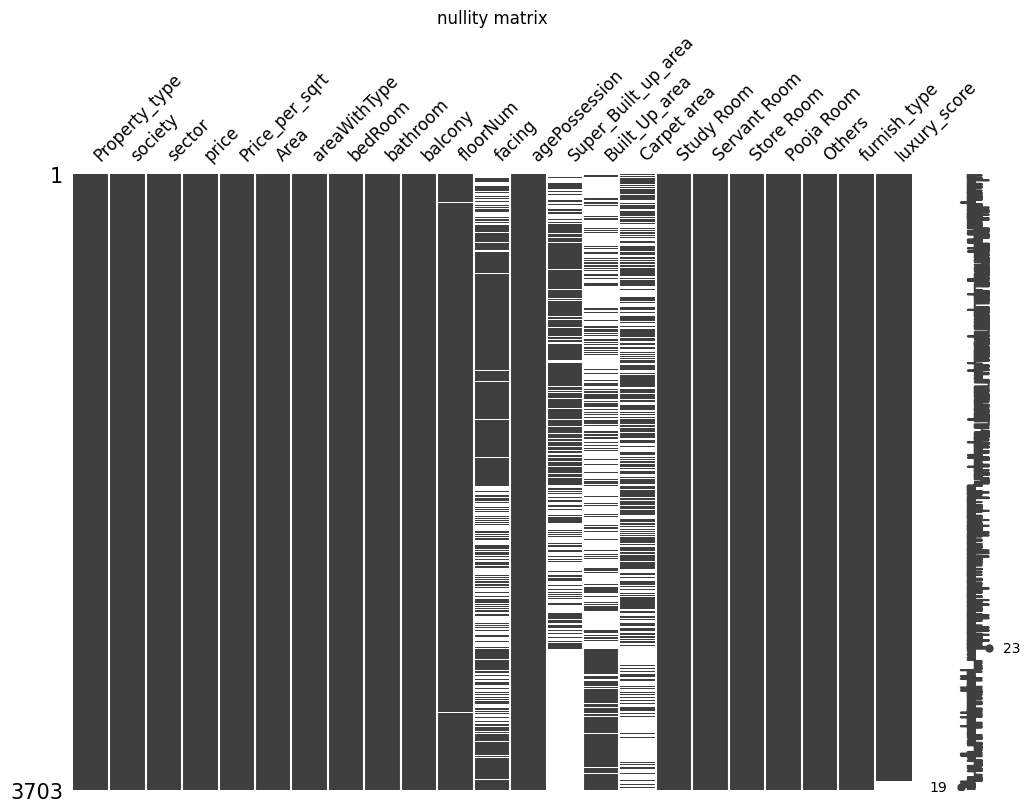

In [ ]:
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
# Set the figure size
plt.figure(figsize=(12, 8))

# Create the nullity matrix plot
msno.matrix(df, figsize=(12, 8), fontsize=12)
plt.title('nullity matrix')
# Display the plot
plt.show()

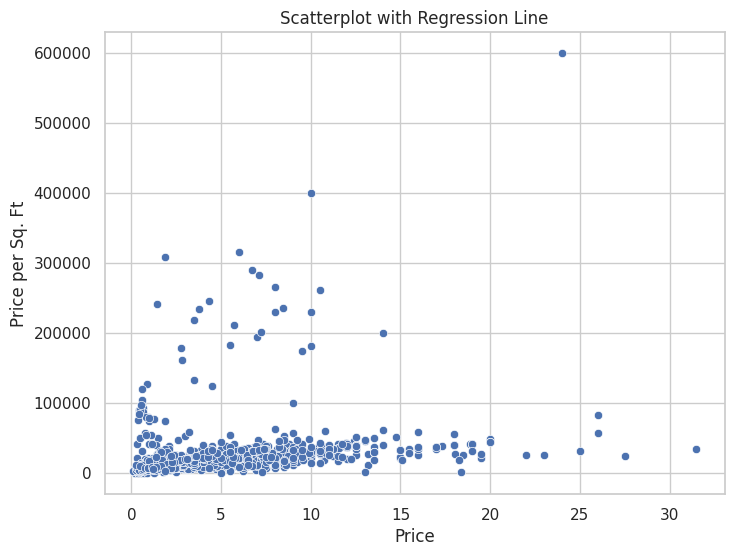

In [ ]:
# Set up the plot style
sns.set(style="whitegrid")

# Scatterplot with regression line
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='price', y='Price_per_sqrt')
plt.title('Scatterplot with Regression Line')
plt.xlabel('Price')
plt.ylabel('Price per Sq. Ft')
plt.show()

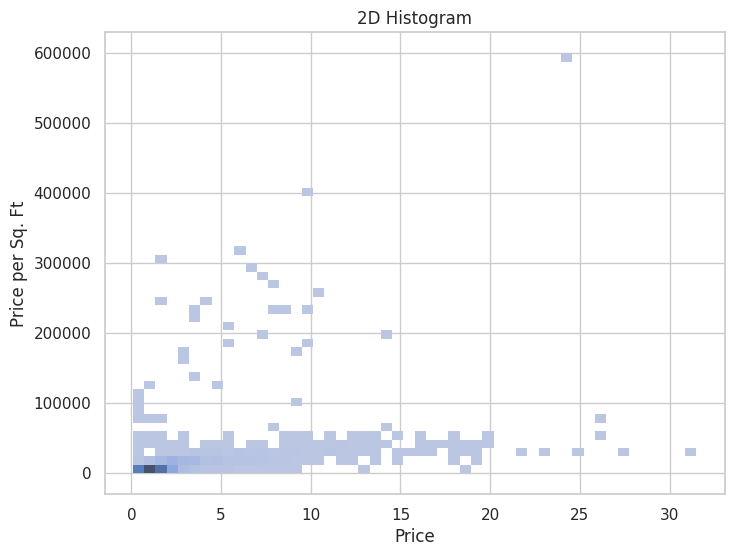

In [ ]:
# 2D Histogram
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='price', y='Price_per_sqrt', bins=50)
plt.title('2D Histogram')
plt.xlabel('Price')
plt.ylabel('Price per Sq. Ft')
plt.show()

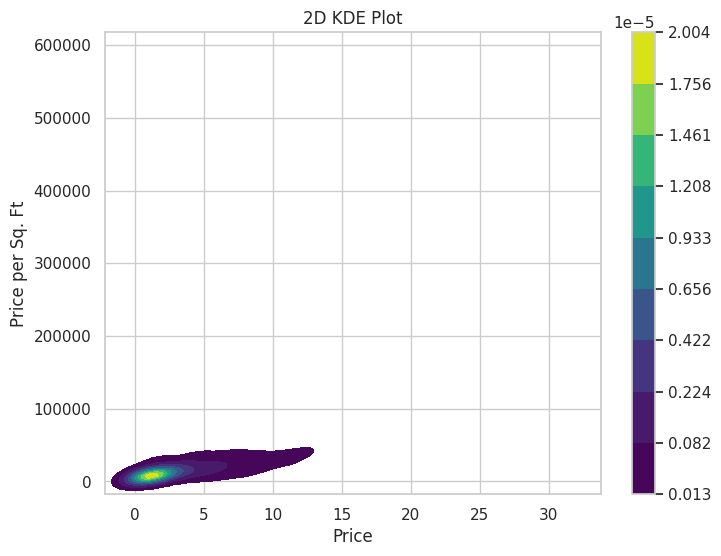

In [ ]:
# 2D KDE Plot
plt.figure(figsize=(8, 6))
sns.kdeplot(data=df, x='price', y='Price_per_sqrt', fill=True, cmap='viridis', cbar=True)
plt.title('2D KDE Plot')
plt.xlabel('Price')
plt.ylabel('Price per Sq. Ft')
plt.show()

In [ ]:
df[df['Price_per_sqrt']>500000]

Property_type                 society     sector  price  Price_per_sqrt  \
3352         house  emaar the palm springs  sector 54   24.0        600000.0   

       Area                areaWithType  bedRoom  bathroom balcony  floorNum  \
3352  400.0  Plot area 400(37.16 sq.m.)      5.0       5.0       2       1.0   

          facing agePossession  Super_Built_up_area  Built_Up_area  \
3352  North-East  Old Property                  NaN          400.0   

      Carpet area  Study Room  Servant Room  Store Room  Pooja Room  Others  \
3352          NaN           1             1           0           1       0   

      furnish_type  luxury_score  
3352             1          28.0


##`data points at lower price values and corresponding lower price per square foot. This indicates that most properties in the dataset are priced affordably with standard pricing per square foot.`

##`A few data points deviate significantly, with much higher values of price per square foot compared to the majority. These might be luxury or premium properties.`

##`non linear relationship -- relationship between price and price per square foot is complex or influenced by other factors.`

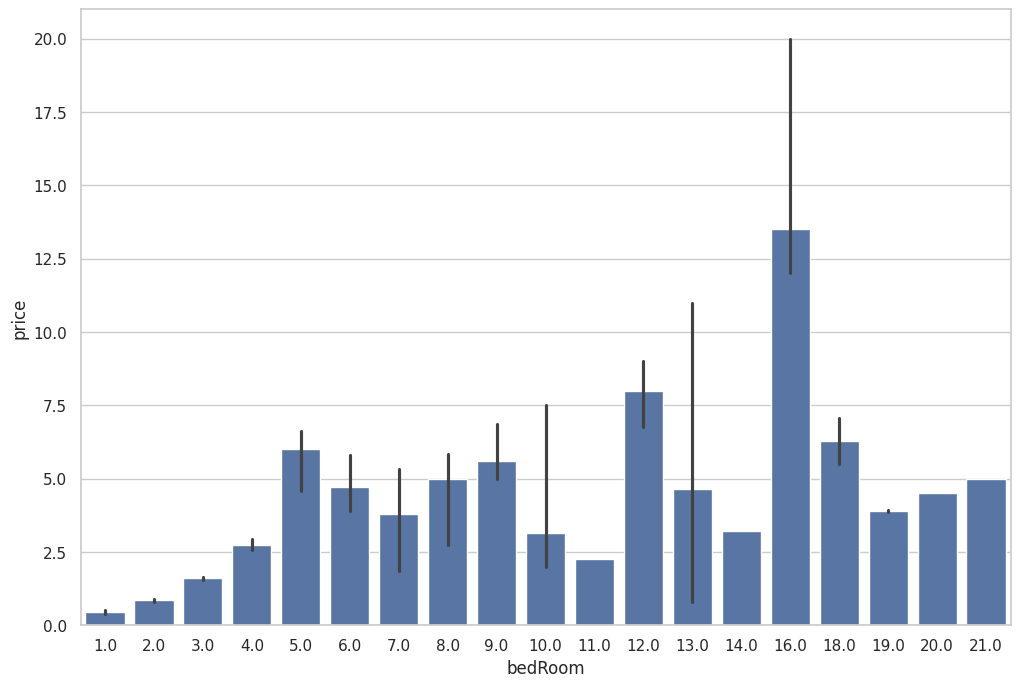

In [ ]:
## price vs bedRoom
# Barplot
plt.figure(figsize=(12,8))
sns.barplot(df,y=df['price'],x=df['bedRoom'],estimator=np.median)
plt.show()
# Boxplot
box_fig = px.box(
    df,
    x='bedRoom',
    y='price',
    title='Boxplot of Price vs. Bedroom',
    labels={'bedroom': 'Bedroom', 'price': 'Price'},
    template='plotly_white'
)
box_fig.show()

##`some specific property with specific bedRoom no. have high variation in price like (7,8,13,16) and same  specific property with specific bedRoom no.are pron to otliers like(3,4)`

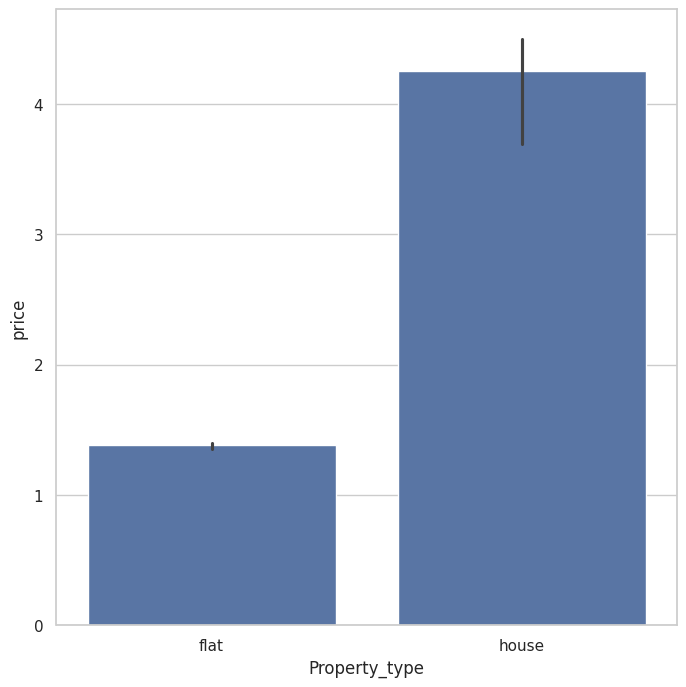

In [ ]:
# price vs property_type
# Barplot
plt.figure(figsize=(8,8))
sns.barplot(df,y=df['price'],x=df['Property_type'],estimator=np.median)
plt.show()
# Boxplot
box_fig = px.box(
    df,
    x='Property_type',
    y='price',
    title='Boxplot of Price vs. Property_type',
    template='plotly_white'
)
box_fig.show()

In [ ]:
## outliers count
df[(df['price']>3.75) & (df['Property_type']=='flat')].shape

(193, 23)

In [ ]:
df[(df['price']>16) & (df['Property_type']=='house')].shape

(30, 23)

## ` there is much more variation in  price for houses then flats but flats have significantly more outliers then houses`

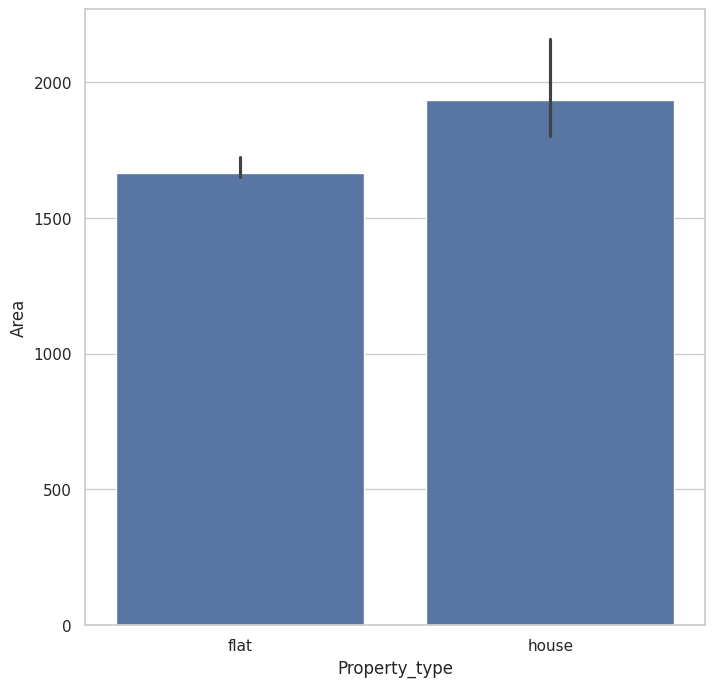

In [ ]:
## property_type vs area
# Barplot
plt.figure(figsize=(8,8))
sns.barplot(df,y=df['Area'],x=df['Property_type'],estimator=np.median)
plt.show()
# Boxplot
box_fig = px.box(
    df,
    x='Property_type',
    y='Area',
    title='Boxplot of Area vs. Property_type',
    template='plotly_white'
)
box_fig.show()

In [ ]:
df[df['Area']>560000]

Property_type                    society      sector  price  \
109           flat      signature the roselia   sector 95   0.45   
1278          flat            ramsons kshitij   sector 95   0.31   
1937          flat  signature global solera 2  sector 107   0.51   

      Price_per_sqrt           Area                          areaWithType  \
109              7.0  642857.142857  Carpet area: 569243 (52884.41 sq.m.)   
1278             5.0  620000.000000   Carpet area: 607936 (56479.1 sq.m.)   
1937             9.0  566666.666667  Carpet area: 514396 (47788.95 sq.m.)   

      bedRoom  bathroom balcony  floorNum      facing  \
109       2.0       2.0       1       2.0  South-West   
1278      2.0       2.0       1       1.0  North-East   
1937      2.0       2.0       3       3.0       North   

                agePossession  Super_Built_up_area  Built_Up_area  \
109              New Property                  NaN            NaN   
1278  Relatively New Property                  NaN            NaN   
1937             New Property                  NaN            NaN   

      Carpet area  Study Room  Servant Room  Store Room  Pooja Room  Others  \
109       569.243           0             0           0           0       0   
1278      607.936           1             0           0           0       1   
1937      514.396           0             0           0           0       0   

      furnish_type  luxury_score  
109              0          26.0  
1278             0          37.0  
1937             0          90.0

In [ ]:
df.loc[109,'Area']=569.243
df.loc[1278,'Area']=607.936
df.loc[1937,'Area']=514.396

In [ ]:
df[(df['Area']>18000) & (df['Property_type']=='flat')]

Property_type                society      sector  price  Price_per_sqrt  \
78            flat          pyramid elite   sector 86   0.46            79.0   
1276          flat        ramsons kshitij   sector 95   0.24            53.0   
1279          flat             rof ananda   sector 95   0.33            60.0   
1280          flat             rof ananda   sector 95   0.38            58.0   
1281          flat             rof ananda   sector 95   0.21            61.0   
1402          flat  signature the serenas  sohna road   0.28            57.0   
2291          flat             rof ananda   sector 95   0.38            58.0   
2386          flat             godrej air   sector 85   2.50          1379.0   

              Area                        areaWithType  bedRoom  bathroom  \
78    58227.848101  Carpet area: 58141 (5401.48 sq.m.)      2.0       2.0   
1276  45283.018868  Carpet area: 45966 (4270.38 sq.m.)      2.0       2.0   
1279  55000.000000  Carpet area: 54917 (5101.96 sq.m.)      2.0       2.0   
1280  65517.241379  Carpet area: 64412 (5984.07 sq.m.)      3.0       2.0   
1281  34426.229508  Carpet area: 34401 (3195.96 sq.m.)      1.0       1.0   
1402  49122.807018  Carpet area: 48811 (4534.69 sq.m.)      1.0       1.0   
2291  65517.241379  Carpet area: 64529 (5994.94 sq.m.)      2.0       2.0   
2386  18129.079043  Carpet area: 18122 (1683.59 sq.m.)      4.0       5.0   

     balcony  floorNum      facing            agePossession  \
78        3+       0.0         NaN       Under Construction   
1276       1      10.0  North-West  Relatively New Property   
1279       1      13.0  South-West  Relatively New Property   
1280      3+      12.0       North  Relatively New Property   
1281       3      13.0       North  Relatively New Property   
1402       3       1.0  North-West  Relatively New Property   
2291       2      10.0        East             New Property   
2386       3      16.0  North-East                undefined   

      Super_Built_up_area  Built_Up_area  Carpet area  Study Room  \
78                    NaN            NaN       581.41           0   
1276                  NaN            NaN       459.66           0   
1279                  NaN            NaN       549.17           0   
1280                  NaN            NaN       644.12           0   
1281                  NaN            NaN       344.01           0   
1402                  NaN            NaN       488.11           1   
2291                  NaN            NaN       645.29           1   
2386                  NaN            NaN       181.22           1   

      Servant Room  Store Room  Pooja Room  Others  furnish_type  luxury_score  
78               0           0           0       0             0         105.0  
1276             0           0           0       1             0          56.0  
1279             0           0           0       0             0          51.0  
1280             0           0           0       0             0          68.0  
1281             0           0           0       0             0          82.0  
1402             0           0           0       0             0          33.0  
2291             0           0           0       0             0         129.0  
2386             0           0           1       1             1          12.0

In [ ]:
df.loc[1279,'Area']=549.17
df.loc[1280,'Area']=644.12
df.loc[1281,'Area']=344.01
df.loc[2291,'Area']=645.29
df.loc[2291,'Area']=645.29

In [ ]:
df.loc[2386,'Area']=1812.22

In [ ]:
df.loc[78,'Area']=581.141
df.loc[1276,'Area']=459.66
df.loc[1402,'Area']=488.11

In [ ]:
df=df[~((df['Area']>46000) & (df['Property_type']=='house'))]
df.shape

(3698, 23)

##`there is much more variation in area for houses then flats but flats have significantly more outliers then houses`

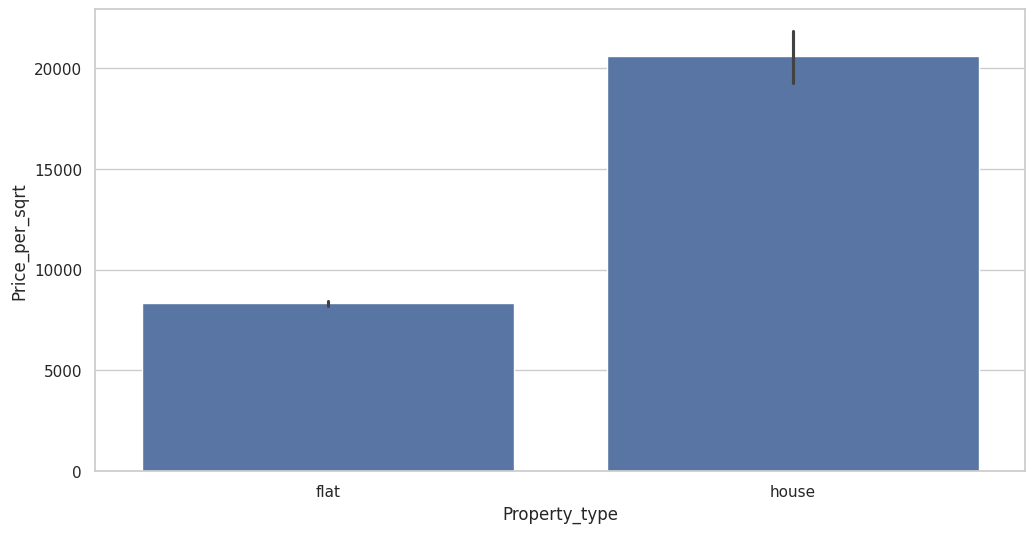

In [ ]:
## property_type vs price_per_sqrt
# Barplot
plt.figure(figsize=(12,6))
sns.barplot(df,y=df['Price_per_sqrt'],x=df['Property_type'],estimator=np.median)
plt.show()
# Boxplot
box_fig = px.box(
    df,
    x='Property_type',
    y='Price_per_sqrt',
    title='Boxplot of price_per_sqrt vs. Property_type',
    template='plotly_white'
)
box_fig.show()

In [ ]:
df[(df['Price_per_sqrt']>100000) &(df['Property_type']=='flat')]

Property_type             society     sector  price  Price_per_sqrt  \
2507          flat  ambience caitriona  sector 24   14.0        200000.0   

       Area                      areaWithType  bedRoom  bathroom balcony  \
2507  700.0  Built Up area: 700 (65.03 sq.m.)      4.0       5.0       3   

      floorNum facing agePossession  Super_Built_up_area  Built_Up_area  \
2507       3.0   East     undefined                  NaN          700.0   

      Carpet area  Study Room  Servant Room  Store Room  Pooja Room  Others  \
2507          NaN           0             0           0           0       0   

      furnish_type  luxury_score  
2507             1          29.0

In [ ]:
df.loc[2507,'Price_per_sqrt']=20000

In [ ]:
df[(df['Price_per_sqrt']>300000) &(df['Property_type']=='house')]

Property_type                 society     sector  price  Price_per_sqrt  \
3123         house             Independent  sector 12   6.00        315789.0   
3309         house                   ansal  sector 43   1.85        308333.0   
3352         house  emaar the palm springs  sector 54  24.00        600000.0   
3392         house  dlf city plots phase 2  sector 25  10.00        400000.0   

       Area                                       areaWithType  bedRoom  \
3123  190.0  Plot area 190(17.65 sq.m.)Carpet area: 1600 sq...      9.0   
3309   60.0                           Plot area 60(5.57 sq.m.)      8.0   
3352  400.0                         Plot area 400(37.16 sq.m.)      5.0   
3392  250.0                         Plot area 250(23.23 sq.m.)     12.0   

      bathroom balcony  floorNum      facing            agePossession  \
3123       6.0       1       2.0  North-East             Old Property   
3309       8.0       1       5.0  North-West  Relatively New Property   
3352       5.0       2       1.0  North-East             Old Property   
3392      12.0       2       4.0       North  Relatively New Property   

      Super_Built_up_area  Built_Up_area  Carpet area  Study Room  \
3123                  NaN            NaN       1600.0           0   
3309                  NaN           60.0          NaN           0   
3352                  NaN          400.0          NaN           1   
3392                  NaN          250.0          NaN           1   

      Servant Room  Store Room  Pooja Room  Others  furnish_type  luxury_score  
3123             0           0           0       0             1           0.0  
3309             0           0           0       0             1          62.0  
3352             1           0           1       0             1          28.0  
3392             1           0           0       0             2          32.0

In [ ]:
df.loc[3123,'Price_per_sqrt']=31578.90
df.loc[3309,'Price_per_sqrt']=30833.30
df.loc[3352,'Price_per_sqrt']=60000.00
df.loc[3392,'Price_per_sqrt']=40000.00

In [ ]:
(58*100000)/670

8656.716417910447

In [ ]:
df[(df['Price_per_sqrt']>60000) &(df['Property_type']=='house')]

Property_type                       society      sector  price  \
2959         house                   Independent    sector 4   0.58   
2960         house                   Independent    sector 4   0.65   
2961         house                   Independent    sector 4   0.61   
2962         house                   Independent    sector 4   0.67   
2978         house                   Independent   sector 12   1.00   
3000         house                   Independent    sector 3   0.90   
3029         house                   Independent   sector 38   8.00   
3034         house                   Independent   sector 28   0.45   
3065         house          bhim nagar, sector 6    sector 6   0.85   
3106         house                   Independent   sector 12   3.50   
3110         house                   Independent    sector 4   1.25   
3113         house                 dlf the grove   sector 54   5.70   
3114         house                   Independent  sector 104   0.80   
3117         house                     rk excelo   sector 12   0.60   
3119         house                   Independent   sector 28   4.50   
3126         house             ansal api esencia   sector 67   1.85   
3133         house                   Independent    sector 4   0.60   
3161         house                   Independent   sector 24  10.00   
3168         house                   Independent   sector 17   3.50   
3173         house                   Independent   sector 13   0.50   
3181         house           huda plot sector 38   sector 38   4.30   
3187         house                    ardee city   sector 52   5.50   
3208         house                   Independent  sector 105   0.55   
3214         house                   Independent  sector 105   0.38   
3216         house  project housing board colony   sector 31   8.00   
3233         house      unitech uniworld resorts   sector 33  10.00   
3251         house                   Independent   sector 13   9.00   
3280         house                      ss omnia   sector 86   0.42   
3366         house                   Independent   sector 55   1.45   
3372         house             vatika india next   sector 82   7.00   
3387         house                   Independent   sector 26  26.00   
3406         house        dlf city plots phase 2   sector 25  10.50   
3407         house          eros rosewood villas   sector 49   2.75   
3451         house        unitech deerwood chase   sector 50   8.45   
3462         house                   Independent   sector 23   2.80   
3473         house            vipul tatvam villa   sector 48   7.25   
3508         house        emaar the palm springs   sector 54  14.00   
3580         house   unitech nirvana birch court   sector 50   7.10   
3591         house      unitech uniworld resorts   sector 33   9.50   
3615         house                   Independent   sector 54   3.75   
3635         house                uppal southend   sector 49   6.75   
3653         house                   Independent   sector 57   8.00   
3668         house                   Independent    sector 7   1.00   

      Price_per_sqrt     Area  \
2959         86567.0    67.00   
2960         92857.0    70.00   
2961        100000.0    61.00   
2962         88157.0    76.00   
2978         74074.0   135.00   
3000         80357.0   112.00   
3029        230547.0   347.00   
3034         90000.0    50.00   
3065        126865.0    67.00   
3106        133079.0   263.00   
3110         78125.0   160.00   
3113        211111.0   270.00   
3114         80000.0   100.00   
3117        120000.0    50.00   
3119        125000.0   360.00   
3126         74000.0   250.00   
3133        105263.0    57.00   
3161        229885.0   435.00   
3168        218750.0   160.00   
3173         90909.0    55.00   
3181        245398.0   175.23   
3187        183333.0   300.00   
3208         98214.0    56.00   
3214         76000.0    50.00   
3216         63492.0  1260.00   
3233        181818.0  

##`there is much more variation in price_per_sqft for houses then flat but both have significantly number outliers`

- ` all these are not outliers but data miscalculation`

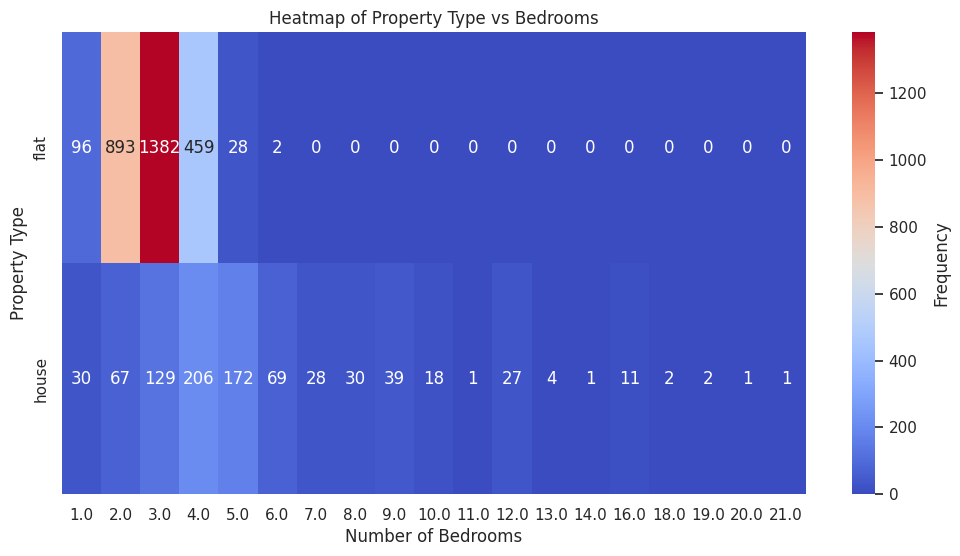

In [ ]:
# Create the heatmap
plt.figure(figsize=(12, 6))  # Adjust the size of the heatmap
sns.heatmap(pd.crosstab(df['Property_type'],df['bedRoom']), annot=True, cmap='coolwarm', fmt='d', cbar_kws={'label': 'Frequency'})

# Customize the heatmap further
plt.title('Heatmap of Property Type vs Bedrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Property Type')

# Display the heatmap
plt.show()

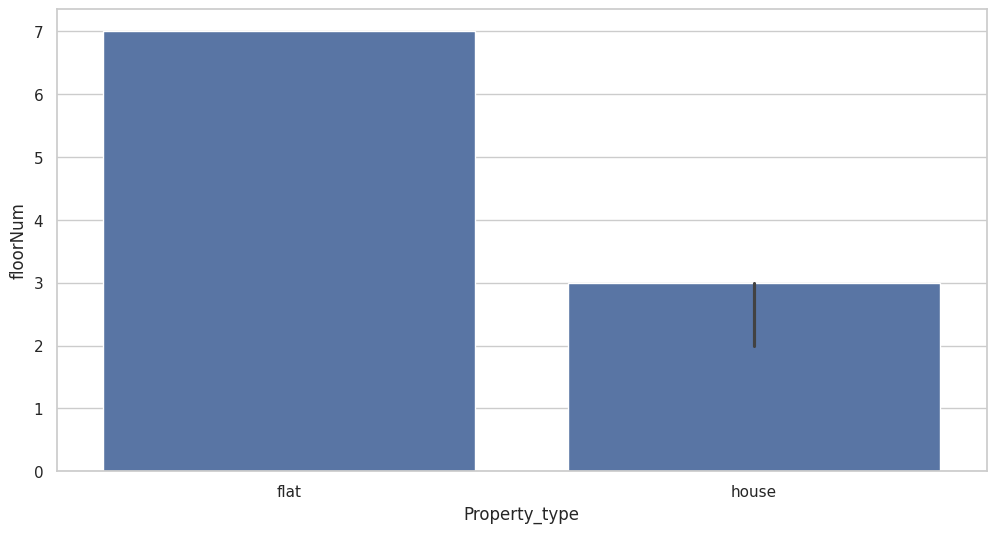

In [ ]:
## property_type vs floor_num
# Barplot
plt.figure(figsize=(12,6))
sns.barplot(df,y=df['floorNum'],x=df['Property_type'],estimator=np.median)
plt.show()
# Boxplot
box_fig = px.box(
    df,
    x='Property_type',
    y='floorNum',
    title='Boxplot of floorNum vs. Property_type',
    template='plotly_white'
)
box_fig.show()

In [ ]:
df[(df['Property_type']=='house') & (df['floorNum']>10)]
## conclusion house villa but in apartment

Property_type                  society      sector  price  \
3008         house               ninex city   sector 76   1.75   
3009         house              spaze privy   sector 72   3.10   
3035         house           ats tourmaline  sector 109   1.87   
3053         house           dlf the arbour   sector 63   8.50   
3081         house              Independent   sector 92   1.80   
3189         house  indiabulls centrum park  sector 103   3.25   
3246         house              greenopolis   sector 89   0.70   
3252         house              spaze privy   sector 72   3.09   
3253         house      satya the hermitage  sector 103   3.15   
3286         house        suncity avenue 76   sector 76   0.75   
3298         house         suncity township   sector 54   2.00   
3410         house      ireo victory valley   sector 67   8.00   
3509         house   vatika the seven lamps   sector 82   1.60   
3651         house          godrej meridien  sector 106   5.60   

      Price_per_sqrt     Area  \
3008          6250.0  2800.00   
3009          8486.0  3653.08   
3035          8697.0  2150.17   
3053         21519.0  3950.00   
3081          7627.0  2360.04   
3189          8125.0  4000.00   
3246          5397.0  1297.02   
3252          6981.0  4426.30   
3253          6702.0  4700.09   
3286         10067.0   745.01   
3298         30968.0   645.83   
3410         22222.0  3600.04   
3509          6597.0  2425.34   
3651         14000.0  4000.00   

                                           areaWithType  bedRoom  bathroom  \
3008                   Carpet area: 2800 (260.13 sq.m.)      4.0       4.0   
3009                       Plot area 3653(339.37 sq.m.)      5.0       5.0   
3035                 Built Up area: 2150 (199.74 sq.m.)      3.0       4.0   
3053                 Built Up area: 3950 (366.97 sq.m.)      4.0       4.0   
3081                 Built Up area: 2360 (219.25 sq.m.)      4.0       5.0   
3189                       Plot area 4000(371.61 sq.m.)      4.0       3.0   
3246                  Built Up area: 1297 (120.5 sq.m.)      2.0       2.0   
3252  Built Up area: 3653 (339.37 sq.m.)Carpet area:...      5.0       5.0   
3253                 Built Up area: 4700 (436.64 sq.m.)      4.0       5.0   
3286  Plot area 745(69.21 sq.m.)Built Up area: 745 s...      2.0       2.0   
3298  Plot area 60Built Up area: 60 sq.m.Carpet area...      9.0       9.0   
3410                        Plot area 400(334.45 sq.m.)      6.0       7.0   
3509                       Plot area 2425(225.29 sq.m.)      4.0       4.0   
3651                       Plot area 4000(371.61 sq.m.)      5.0       4.0   

     balcony  floorNum      facing            agePossession  \
3008       3      14.0         NaN                undefined   
3009      3+      21.0         NaN  Relatively New Property   
3035      3+      12.0         NaN                undefined   
3053       1      27.0         NaN                undefined   
3081       3      13.0         NaN                undefined   
3189       3      20.0         NaN                undefined   
3246      3+      14.0  North-East                undefined   
3252       2      14.0        East  Relatively New Property   
3253       1      12.0        East                undefined   
3286       3      11.0  North-East             New Property   
3298       2      11.0       North  Relatively New Property   
3410      3+      51.0  North-East           Moderately Old   
3509      3+      16.0       North           Moderately Old   
3651       3      33.0  North-East             New Property   

      Super_Built_up_area  Built_Up_area  Carpet area  Study Room  \
3008                  NaN            NaN       2800.0           0   
3009                  NaN         3653.0          NaN           0   
3035                  NaN         2150.0          NaN           0   
3053                  NaN         3950.0          NaN           0   
3081                  NaN         2360.0          NaN   

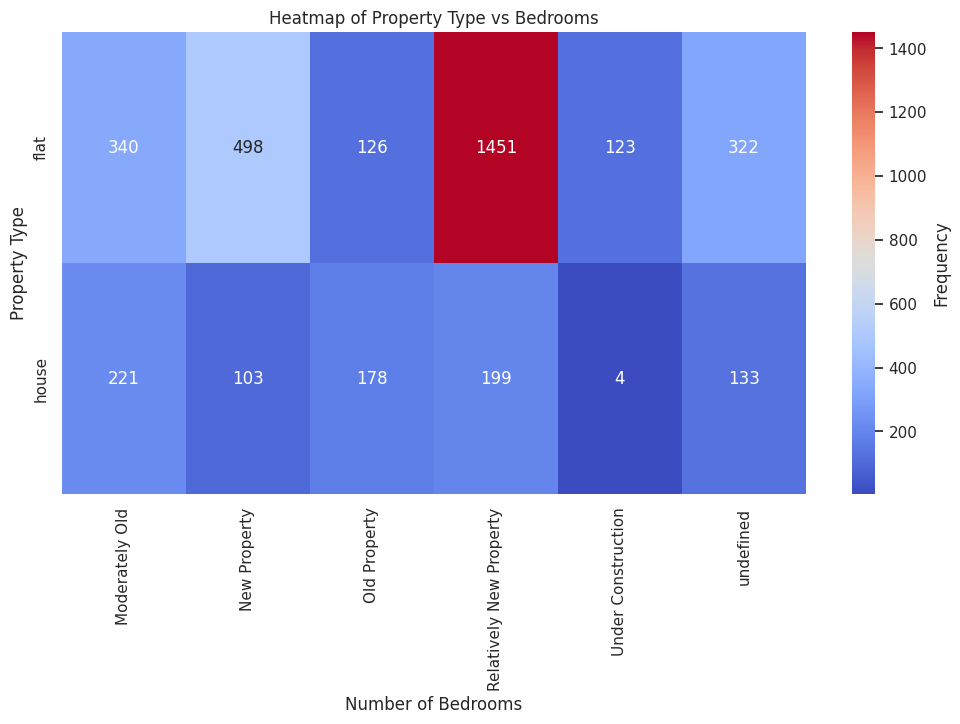

In [ ]:
# Create the heatmap
plt.figure(figsize=(12, 6))  # Adjust the size of the heatmap
sns.heatmap(pd.crosstab(df['Property_type'],df['agePossession']), annot=True, cmap='coolwarm', fmt='d', cbar_kws={'label': 'Frequency'})

# Customize the heatmap further
plt.title('Heatmap of Property Type vs Bedrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Property Type')

# Display the heatmap
plt.show()

In [ ]:
(1451+498)/3698

0.5270416441319632

## `there are nearly 52%  property which are relatively_new(1-5 year old) or new(0-1 year)`

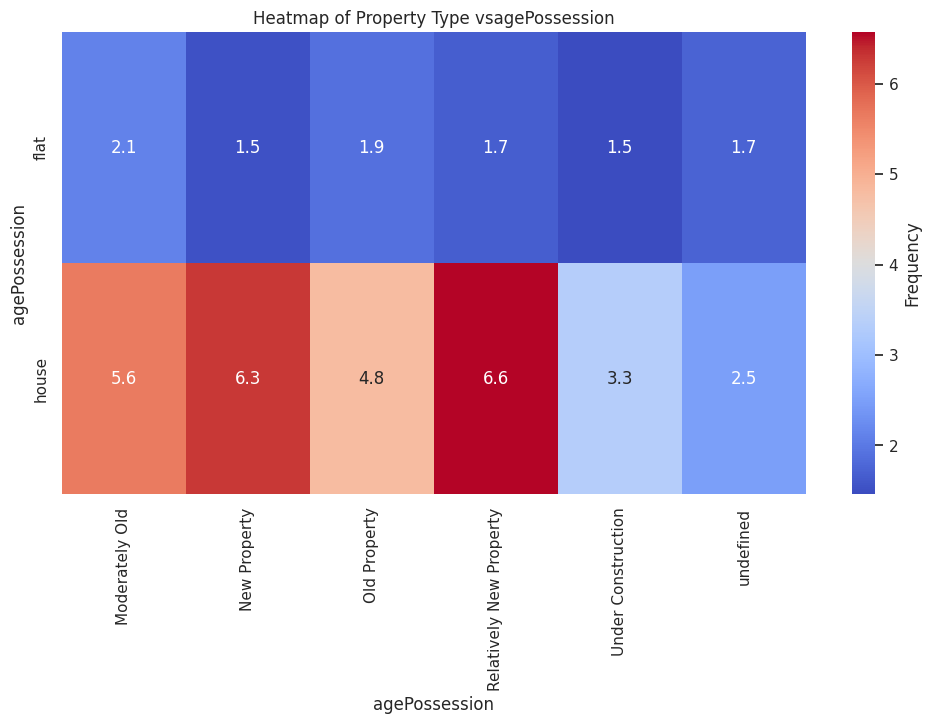

In [ ]:
# Create the heatmap
plt.figure(figsize=(12, 6))  # Adjust the size of the heatmap
sns.heatmap(pd.pivot_table(df,index='Property_type',columns='agePossession',values='price',aggfunc='mean'), annot=True, cmap='coolwarm', cbar_kws={'label': 'Frequency'})

# Customize the heatmap further
plt.title('Heatmap of Property Type vsagePossession')
plt.ylabel('agePossession')

# Display the heatmap
plt.show()

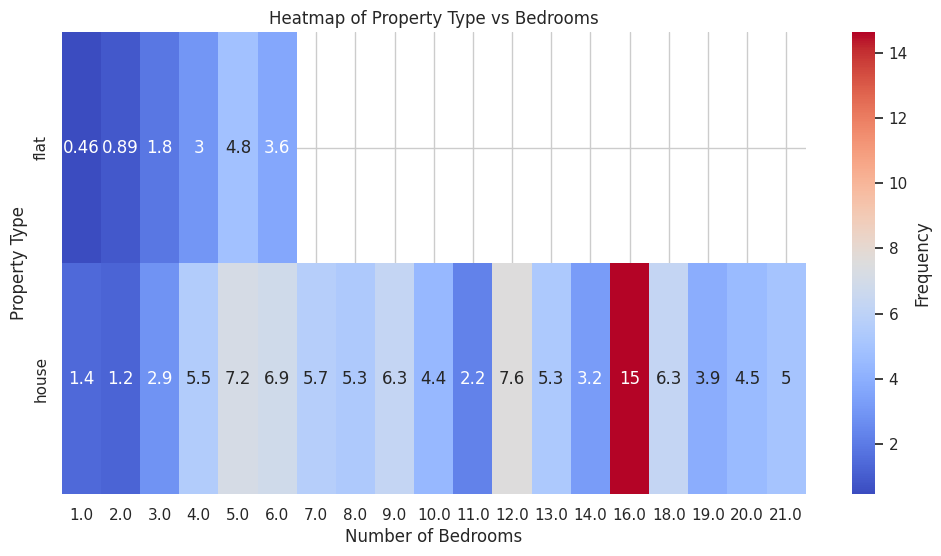

In [ ]:
# Create the heatmap
plt.figure(figsize=(12, 6))  # Adjust the size of the heatmap
sns.heatmap(pd.pivot_table(df,index='Property_type',columns='bedRoom',values='price',aggfunc='mean'), annot=True, cmap='coolwarm', cbar_kws={'label': 'Frequency'})
# Customize the heatmap further
plt.title('Heatmap of Property Type vs Bedrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Property Type')
# Display the heatmap
plt.show()

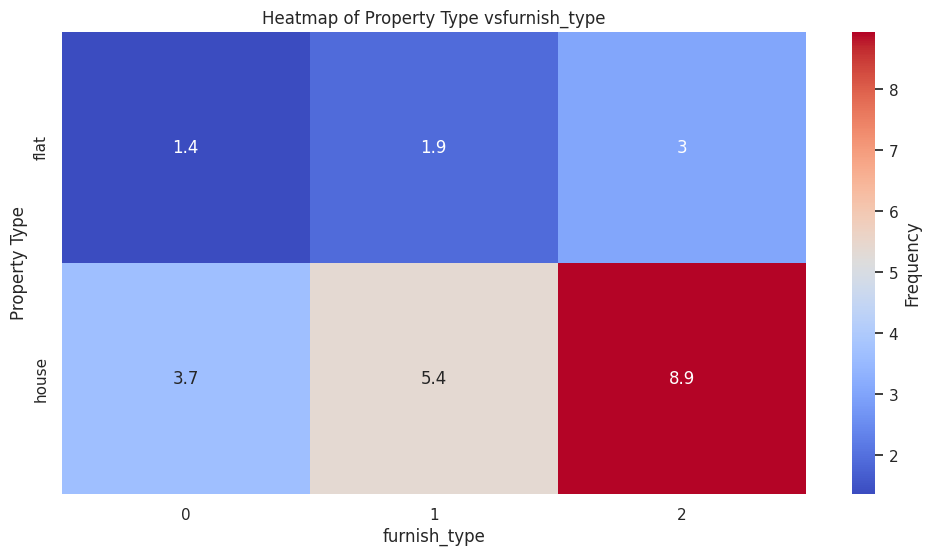

In [ ]:
# Create the heatmap
plt.figure(figsize=(12, 6))  # Adjust the size of the heatmap
sns.heatmap(pd.pivot_table(df,index='Property_type',columns='furnish_type',values='price',aggfunc='mean'), annot=True, cmap='coolwarm', cbar_kws={'label': 'Frequency'})

# Customize the heatmap further
plt.title('Heatmap of Property Type vsfurnish_type')
plt.xlabel('furnish_type')
plt.ylabel('Property Type')

# Display the heatmap
plt.show()

<Axes: xlabel='Property_type', ylabel='luxury_score'>

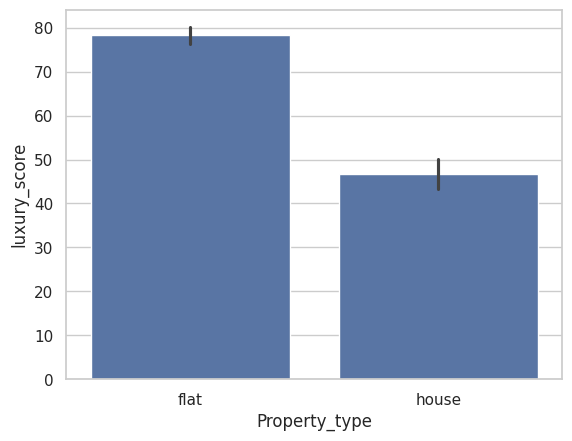

In [ ]:
sns.barplot(x=df['Property_type'],y=df['luxury_score'])

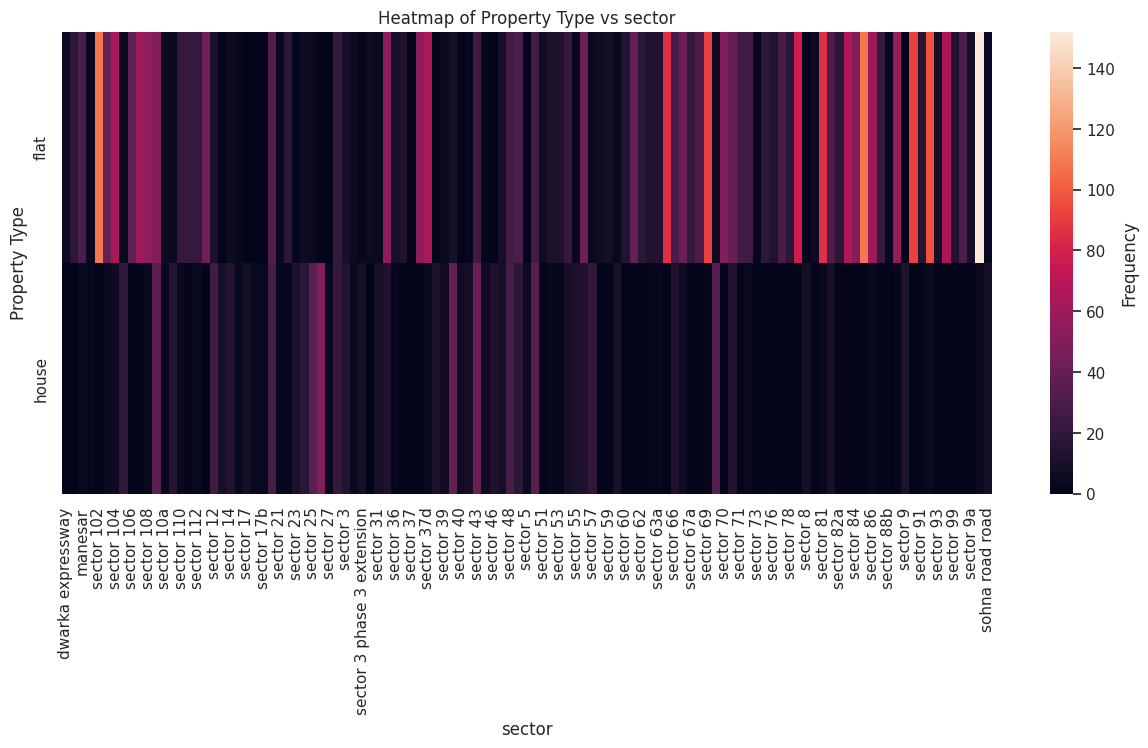

In [ ]:
# Create the heatmap
plt.figure(figsize=(15, 6))  # Adjust the size of the heatmap
sns.heatmap(pd.crosstab(df['Property_type'],df['sector'].sort_index()), annot=False, fmt='d', cbar_kws={'label': 'Frequency'})

# Customize the heatmap further
plt.title('Heatmap of Property Type vs sector')
plt.xlabel('sector')
plt.ylabel('Property Type')

# Display the heatmap
plt.show()

In [ ]:
##  sector analysis with price
import re
avg_price_per_sector=df.groupby('sector')['price'].mean().reset_index()

def extract_sector_number(sector_name):
  match_=re.search(r'\d+',sector_name)
  if match_:
    return int(match_.group())
  else:
    return float('inf')

avg_price_per_sector['sector_number']=avg_price_per_sector['sector'].apply(extract_sector_number)

In [ ]:
avg_price_per_sector_sort_values_by_sector=avg_price_per_sector.sort_values(by='sector_number')

In [ ]:
avg_price_per_sector_sort_values_by_sector

sector      price  sector_number
3                      sector 1   1.860000            1.0
25                     sector 2   2.421129            2.0
35             sector 3 phase 2   0.586667            3.0
34                     sector 3   0.971250            3.0
36   sector 3 phase 3 extension   0.697273            3.0
47                     sector 4   1.135208            4.0
56                     sector 5   2.128333            5.0
67                     sector 6   0.690000            6.0
79                     sector 7   1.703846            7.0
90                     sector 8   0.713750            8.0
102                    sector 9   1.383846            9.0
110                   sector 9a   1.482000            9.0
12                   sector 10a   1.943750           10.0
13                    sector 11   1.717895           11.0
18                    sector 12   1.561622           12.0
19                    sector 13   2.357778           13.0
20                    sector 14   4.770000           14.0
21                    sector 15   2.716667           15.0
22                    sector 17   2.926250           17.0
23                   sector 17a   3.106667           17.0
24                   sector 17b   7.550000           17.0
26                    sector 21   1.025000           21.0
27                    sector 22   3.429000           22.0
28                    sector 23   3.343077           23.0
29                    sector 24   4.720455           24.0
30                    sector 25   8.899000           25.0
31                    sector 26  12.564082           26.0
32                    sector 27   6.833333           27.0
33                    sector 28   4.567143           28.0
37                    sector 30   1.568000           30.0
38                    sector 31   4.382500           31.0
39                    sector 33   2.744265           33.0
41                   sector 36a   1.373333           36.0
40                    sector 36   0.673636           36.0
43                   sector 37c   0.969811           37.0
44                   sector 37d   1.263731           37.0
42                    sector 37   0.670000           37.0
45                    sector 38   3.716667           38.0
46                    sector 39   3.621818           39.0
48                    sector 40   5.781250           40.0
49                    sector 41   6.140909           41.0
50                    sector 43   5.680896           43.0
51                    sector 45   8.498750           45.0
52                    sector 46   4.235385           46.0
53                    sector 47   3.432778           47.0
54                    sector 48   6.079818           48.0
55                    sector 49   3.302500           49.0
57                    sector 50   6.740635           50.0
58                    sector 51   1.560000           51.0
59                    sector 52   2.714286           52.0
60                    sector 53   5.782857           53.0
61                    sector 54   6.222581           54.0
62                    sector 55   4.050714           55.0
63                    sector 56   2.601607           56.0
64                    sector 57   4.767917           57.0
65                    sector 58   3.297143           58.0
66                    sector 59   4.875000           59.0
68                    sector 60   3.987333           60.0
69                    sector 61   2.088293           61.0
70                    sector 62   5.450000           62.0
71                    sector 63   4.663571           63.0
72                   sector 63a   2.750000           63.0
73                    sector 65   3.309770           65.0
74                    sector 66   5.934762           66.0
75                    sector 67   3.122340           67.0
76                   sector 67a   1.422273           67.0
77                    sector 68   1.247667           68.0
78                    sector 69   1.568387           69.0
81                   se

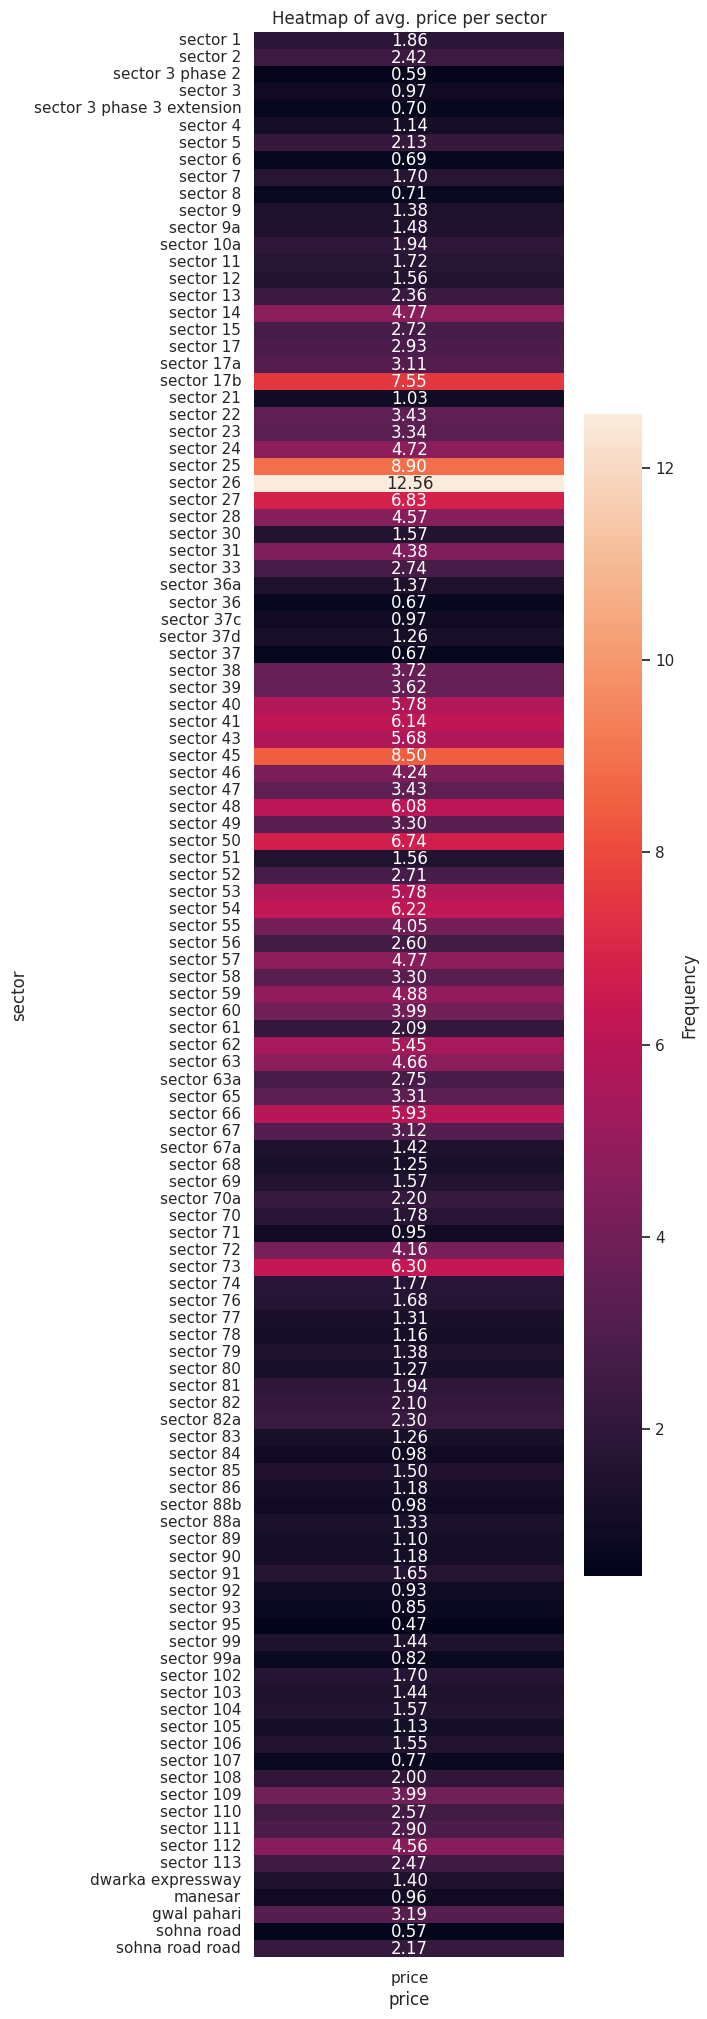

In [ ]:
# Create the heatmap
plt.figure(figsize=(5,25))  # Adjust the size of the heatmap
sns.heatmap(avg_price_per_sector_sort_values_by_sector.set_index('sector')[['price']], annot=True ,fmt='.2f',cbar_kws={'label': 'Frequency'})

# Customize the heatmap further
plt.title('Heatmap of avg. price per sector')
plt.xlabel('price')
plt.ylabel('sector')
# Display the heatmap
plt.show()

In [ ]:
## sector analysis with price_per_sqft
##  sector analysis
import re
avg_price_per_sqft_per_sector=df.groupby('sector')['Price_per_sqrt'].mean().reset_index()
avg_price_per_sqft_per_sector['sector_number']=avg_price_per_sqft_per_sector['sector'].apply(extract_sector_number)
avg_price_per_sqft_per_sector_sort=avg_price_per_sqft_per_sector.sort_values(by='sector_number')

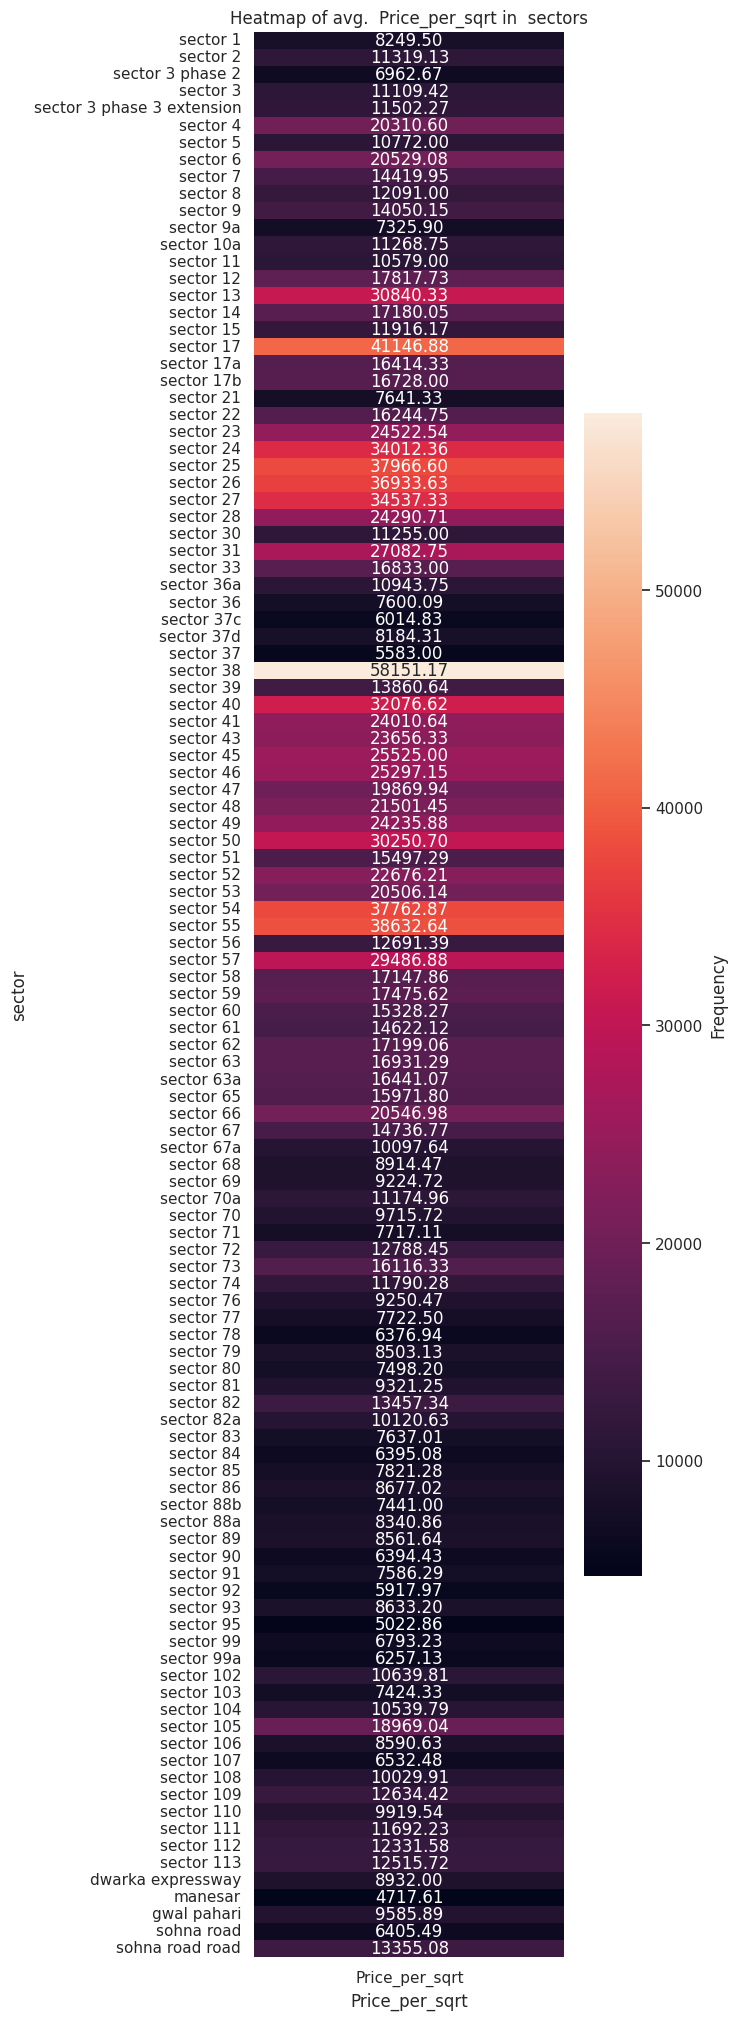

In [ ]:
# Create the heatmap
plt.figure(figsize=(5,25))  # Adjust the size of the heatmap
sns.heatmap(avg_price_per_sqft_per_sector_sort.set_index('sector')[['Price_per_sqrt']], annot=True ,fmt='.2f',cbar_kws={'label': 'Frequency'})
# Customize the heatmap further
plt.title('Heatmap of avg.  Price_per_sqrt in  sectors')
plt.xlabel('Price_per_sqrt')
plt.ylabel('sector')
# Display the heatmap
plt.show()

In [ ]:
## sector analysis with luxury_score
##  sector analysis
import re
avg_luxury_per_sector=df.groupby('sector')['luxury_score'].mean().reset_index()
avg_luxury_per_sector['sector_number']=avg_luxury_per_sector['sector'].apply(extract_sector_number)
avg_luxury_per_sector_sort=avg_luxury_per_sector.sort_values(by='sector_number')

In [ ]:
avg_luxury_per_sector_sort.head()

sector  luxury_score  sector_number
3                     sector 1     43.833333            1.0
25                    sector 2     68.725806            2.0
35            sector 3 phase 2     20.000000            3.0
34                    sector 3     30.833333            3.0
36  sector 3 phase 3 extension     25.909091            3.0

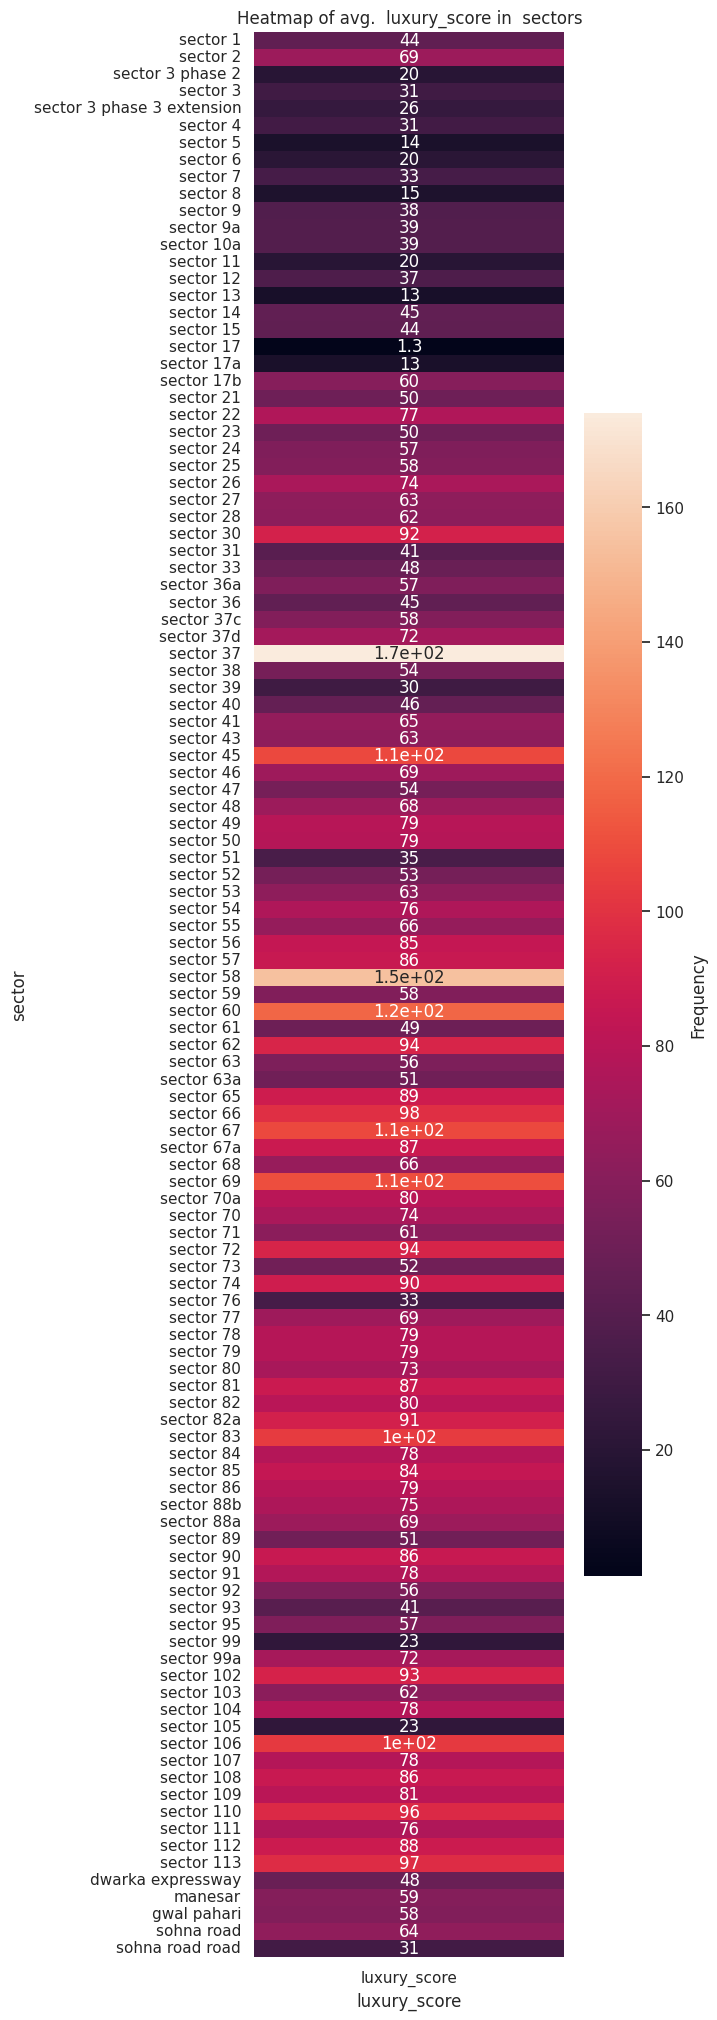

In [ ]:
# Create the heatmap
plt.figure(figsize=(5,25))  # Adjust the size of the heatmap
sns.heatmap(avg_price_per_sqft_per_sector_sort.set_index('sector')[['luxury_score']], annot=True ,cbar_kws={'label': 'Frequency'})
# Customize the heatmap further
plt.title('Heatmap of avg.  luxury_score in  sectors')
plt.xlabel('luxury_score')
plt.ylabel('sector')
# Display the heatmap
plt.show()

In [ ]:
df[df['sector'].str.contains('37')]['price'].mean()

1.1300826446280992

In [ ]:
df[df['sector'].str.contains('26')].shape

(49, 23)

In [ ]:
df[df['sector'].str.contains('17')]['price'].mean()

3.9557142857142855

##`price`

In [ ]:
df.columns

Index(['Property_type', 'society', 'sector', 'price', 'Price_per_sqrt', 'Area',
       'areaWithType', 'bedRoom', 'bathroom', 'balcony', 'floorNum', 'facing',
       'agePossession', 'Super_Built_up_area', 'Built_Up_area', 'Carpet area',
       'Study Room', 'Servant Room', 'Store Room', 'Pooja Room', 'Others',
       'furnish_type', 'luxury_score'],
      dtype='object')

In [ ]:
px.scatter(df,x='Area',y='price',color='bedRoom')

In [ ]:
px.scatter(df,x='Area',y='price',color='agePossession')

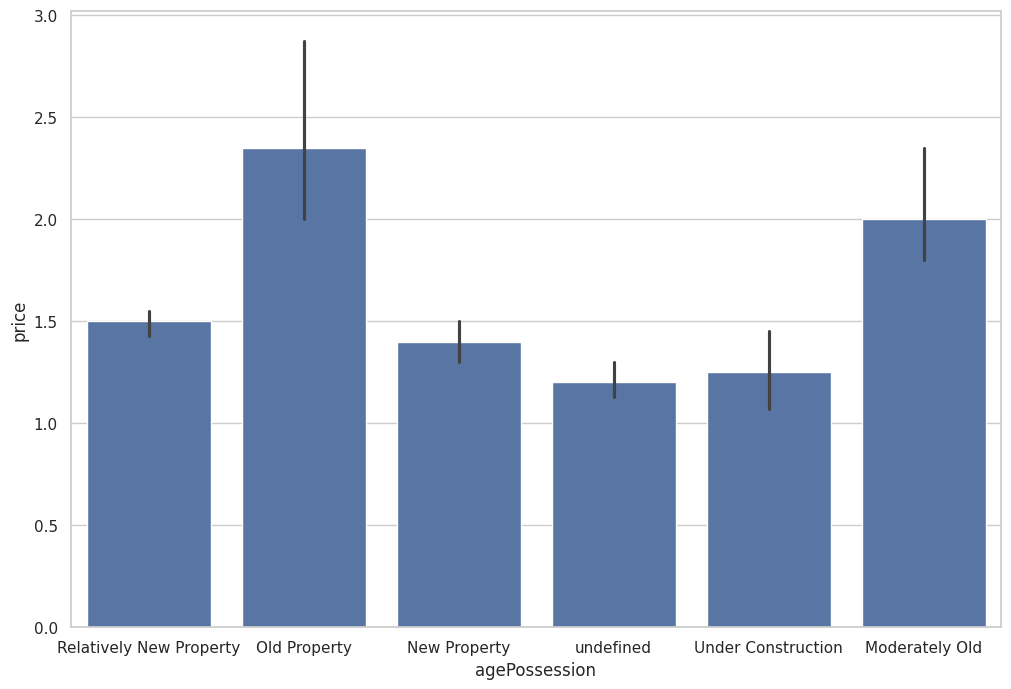

In [ ]:
## price vs agepossession
# Barplot
plt.figure(figsize=(12,8))
sns.barplot(df,y=df['price'],x=df['agePossession'],estimator=np.median)
plt.show()
# Boxplot
box_fig = px.box(
    df,
    x='agePossession',
    y='price',
    title='Boxplot of Price vs. agePossession',
    labels={'bedroom': 'Bedroom', 'price': 'Price'},
    template='plotly_white'
)
box_fig.show()

## `shockingly old and moderately old have high price`
##`price have ouliers or data errors across all agePossesions`

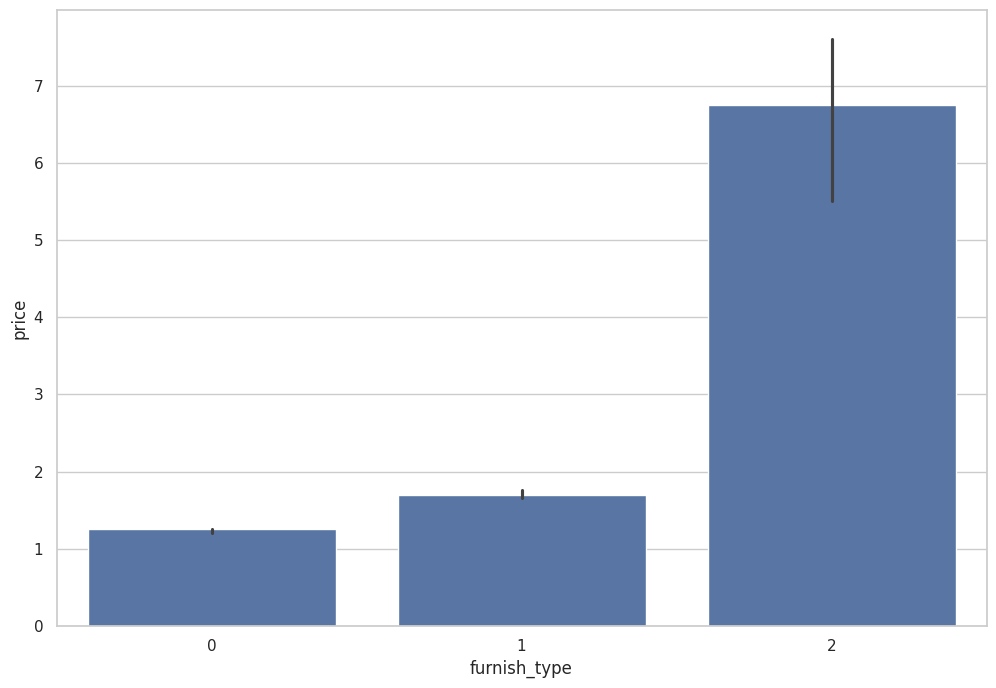

In [ ]:
## price vs furnish_type
# Barplot
plt.figure(figsize=(12,8))
sns.barplot(df,y=df['price'],x=df['furnish_type'],estimator=np.median)
plt.show()
# Boxplot
box_fig = px.box(
    df,
    x='furnish_type',
    y='price',
    title='Boxplot of Price vs.furnish_type',
    template='plotly_white'
)
box_fig.show()

In [ ]:
px.scatter(df,x='luxury_score',y='price')

##`Initially, the luxury_score column appeared to hold potential as a useful predictor for the target variable (price). However, upon further analysis, it was observed that there is no significant relationship or specific correlation between luxury_score and price. `

In [ ]:
## correlation
df.select_dtypes('number').corr()['price'].sort_values()

floorNum              -0.089752
Others                -0.003587
luxury_score           0.011077
Built_Up_area          0.123306
Study Room             0.261714
furnish_type           0.273282
Store Room             0.305154
Pooja Room             0.340836
Servant Room           0.401536
Price_per_sqrt         0.408657
bedRoom                0.523176
Carpet area            0.526025
bathroom               0.588766
Area                   0.616688
Super_Built_up_area    0.772392
price                  1.000000
Name: price, dtype: float64

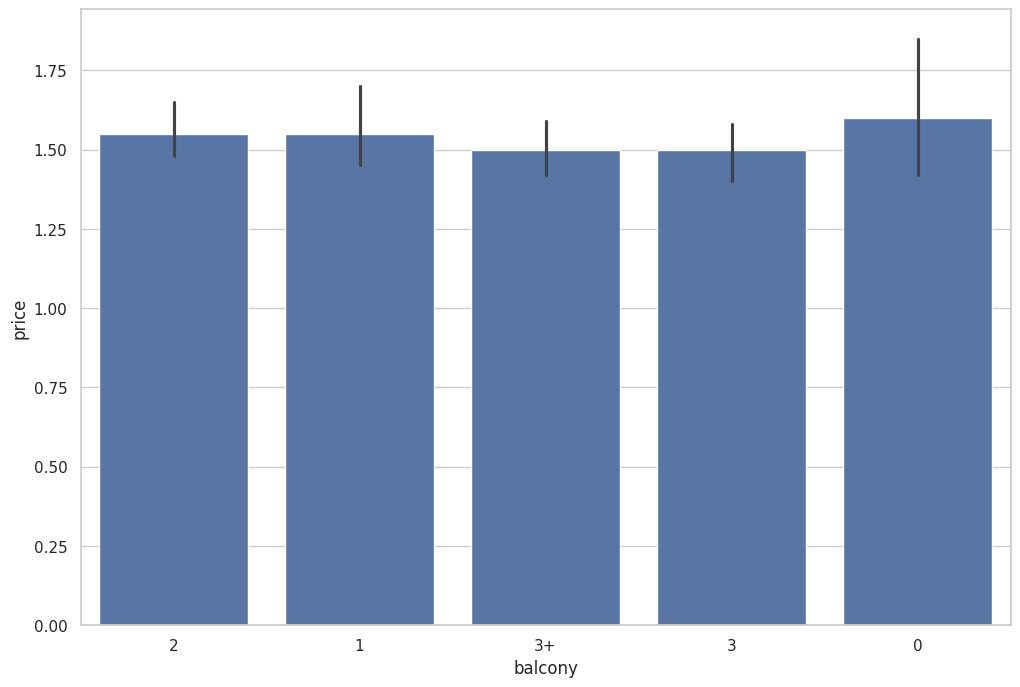

In [ ]:
## price vs bedRoom
# Barplot
plt.figure(figsize=(12,8))
sns.barplot(df,y=df['price'],x=df['balcony'],estimator=np.median)
plt.show()
# Boxplot
box_fig = px.box(
    df,
    x='balcony',
    y='price',
    title='Boxplot of Price vs balcony',
    template='plotly_white'
)
box_fig.show()

##`The median price for all balcony categories (1, 2, 3+, and 0) appears almost the same. This is unusual because, in real estate data, the number of balconies usually has some influence on the price.  indicating data error in`   `price column`


In [ ]:
## price vs bathroom
# Barplot
plt.figure(figsize=(12,8))
sns.barplot(df,y=df['price'],x=df['bathroom'],estimator=np.median)
plt.show()
# Boxplot
box_fig = px.box(
    df,
    x='bathroom',
    y='price',
    title='Boxplot of Price vs.bathrrom',
    template='plotly_white'
)
box_fig.show()

## `clearly we can say there is a data error in price column`
##`Unrealistic Distribution-For certain bathroom counts, the spread in price values is inconsistent or disproportionate, which  indicate data entry errors, unrealistic values`

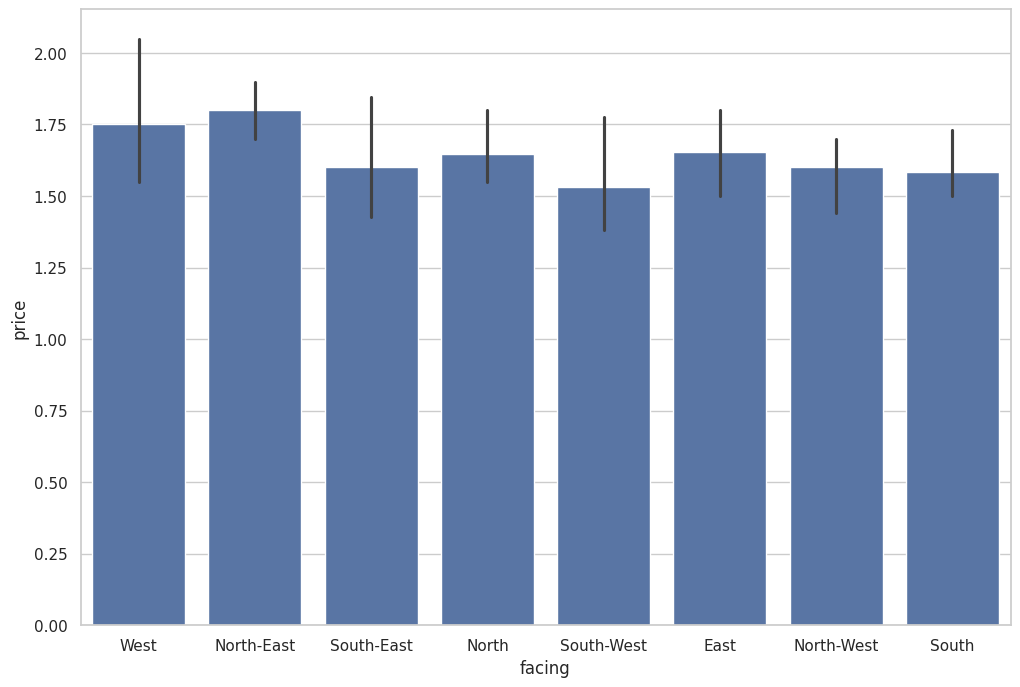

In [ ]:
## price vs facing
# Barplot
plt.figure(figsize=(12,8))
sns.barplot(df,y=df['price'],x=df['facing'],estimator=np.median)
plt.show()
# Boxplot
box_fig = px.box(
    df,
    x='facing',
    y='price',
    title='Boxplot of Price vs facing',
    template='plotly_white'
)
box_fig.show()

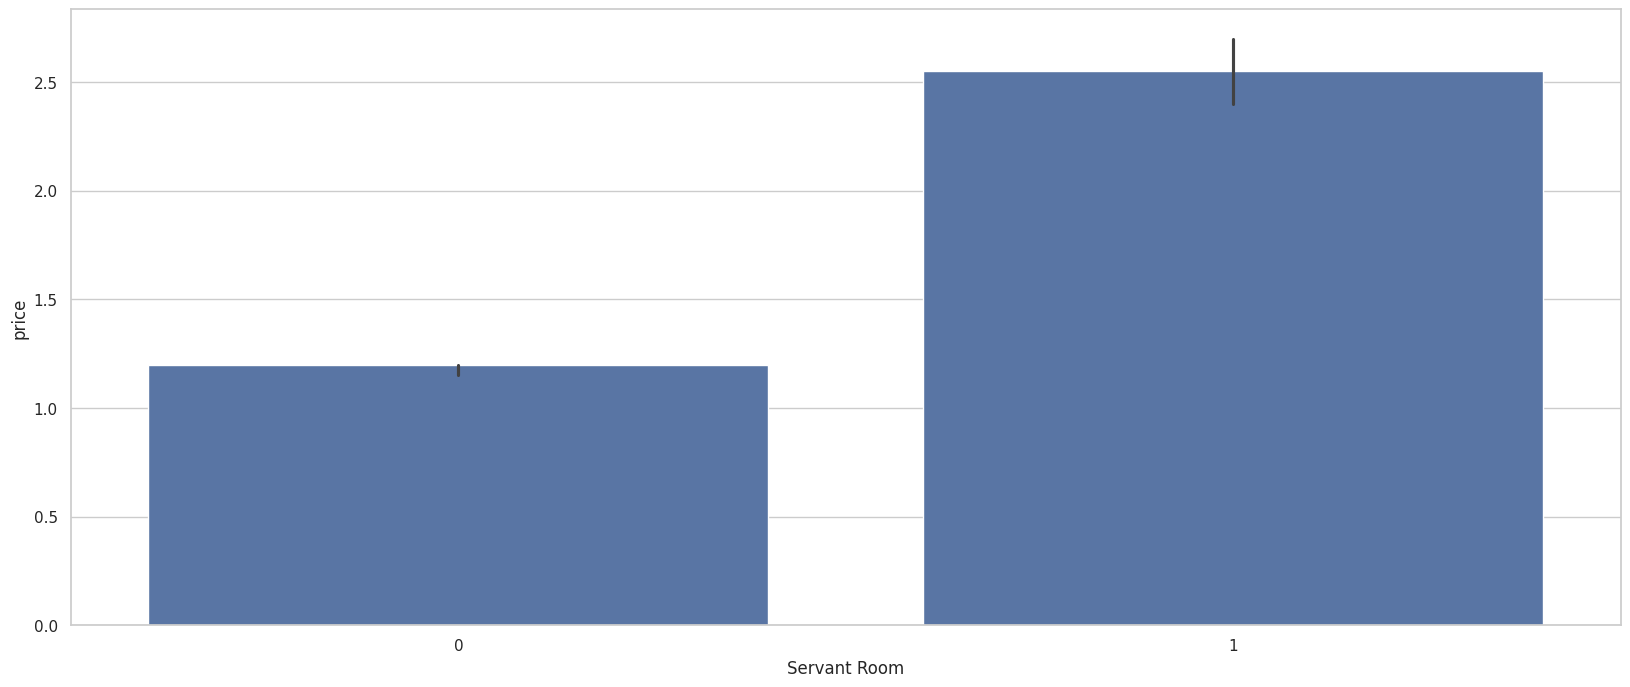

In [ ]:
## price vs bathroom
# Barplot
plt.figure(figsize=(20,8))
sns.barplot(df,y=df['price'],x=df['Servant Room'],estimator=np.median)
plt.show()
# Boxplot
box_fig = px.box(
    df,
    x='Servant Room',
    y='price',
    title='Boxplot of Price vs Servant Room)',
    template='plotly_white'
)
box_fig.show()

## `property which have servent room have high price ca,pare to which  not have servent room.` `But there is also data errors`

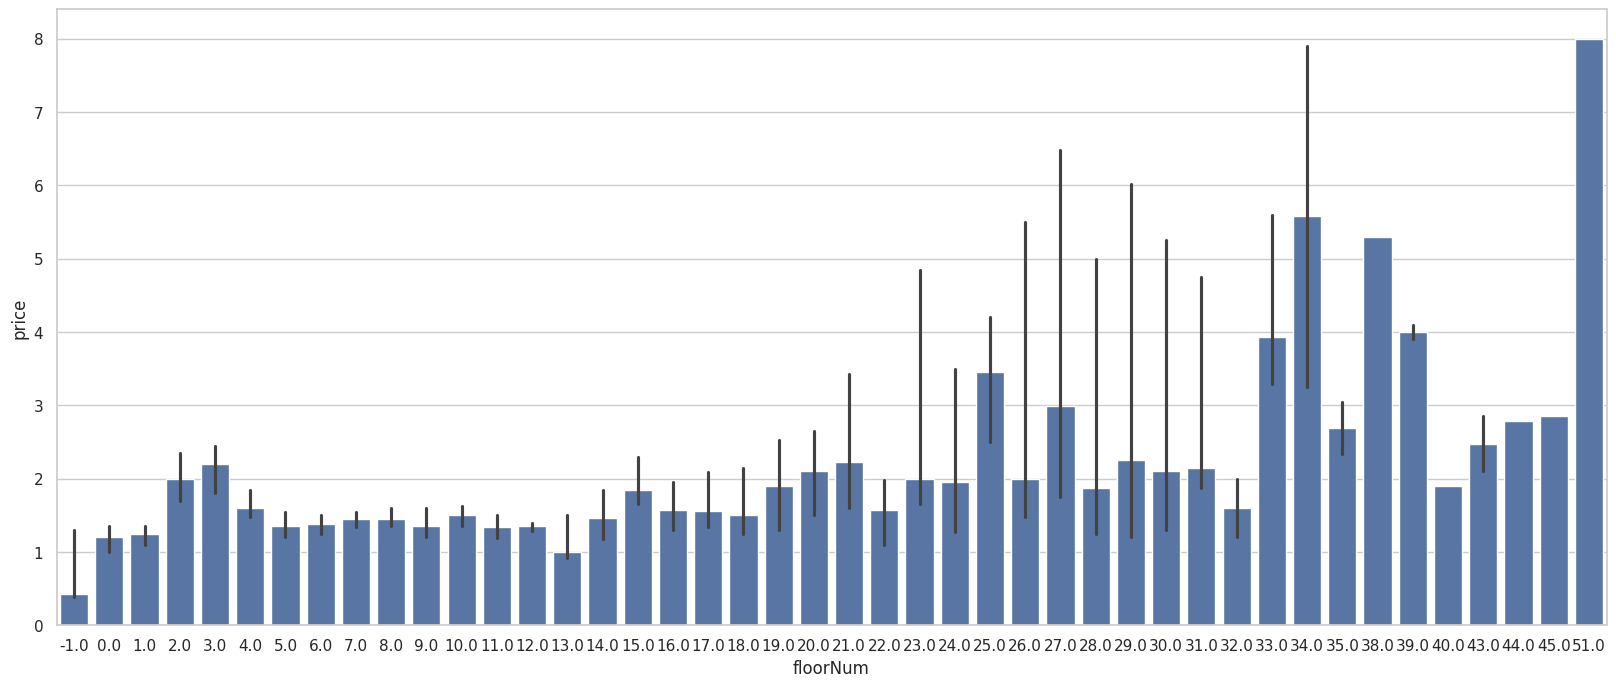

In [ ]:
## price vs bathroom
# Barplot
plt.figure(figsize=(20,8))
sns.barplot(df,y=df['price'],x=df['floorNum'],estimator=np.median)
plt.show()
# Boxplot
box_fig = px.box(
    df,
    x='floorNum',
    y='price',
    title='Boxplot of Price vs floorNum)',
    template='plotly_white'
)
box_fig.show()

In [ ]:
df[df['price']>10]['sector'].value_counts()

sector
sector 26     27
sector 50     18
sector 25     14
sector 66      9
sector 43      9
sector 28      6
sector 48      5
sector 54      5
sector 109     4
sector 56      3
sector 33      3
sector 24      2
sector 65      2
sector 45      2
sector 108     1
sector 60      1
sector 41      1
sector 62      1
sector 2       1
sector 73      1
sector 39      1
sector 40      1
Name: count, dtype: int64

In [ ]:
px.scatter(df,x='price',y='Super_Built_up_area')

In [ ]:
px.scatter(df,x='price',y='Carpet area')

In [132]:
px.scatter(df,x='price',y='Built_Up_area',color='Property_type')

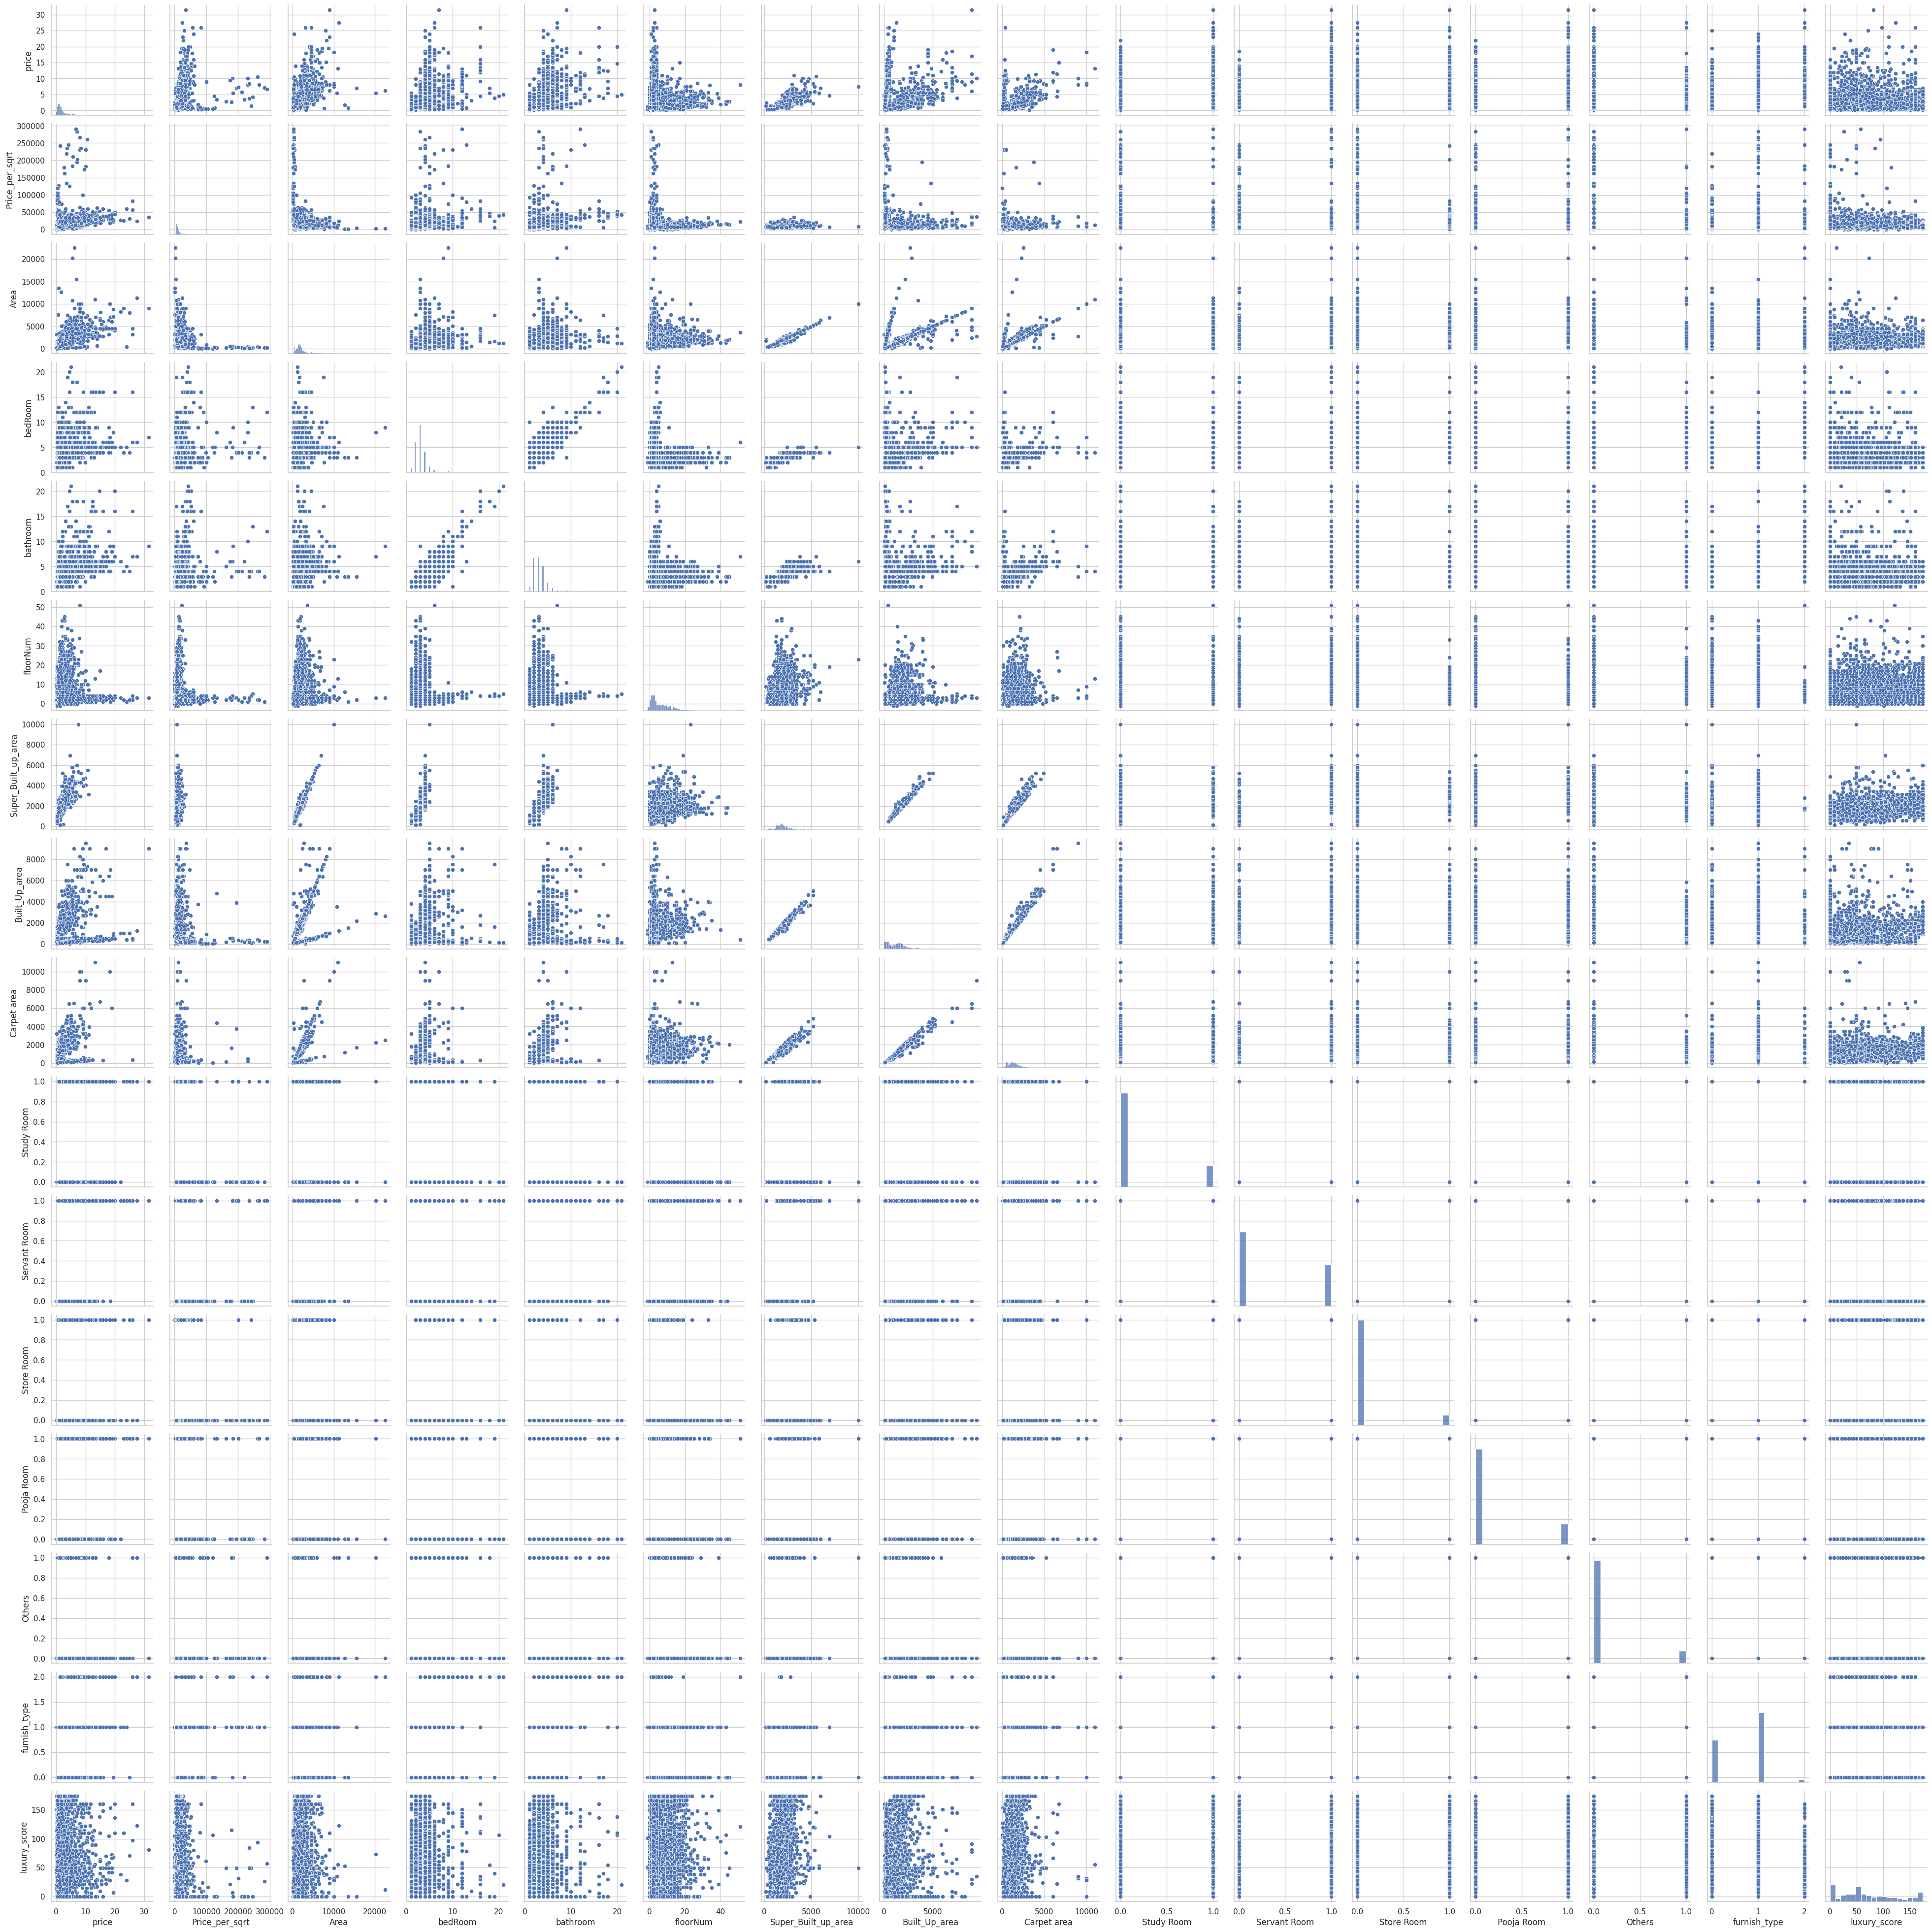

In [ ]:
sns.pairplot(df)

In [131]:
df[df['agePossession']=='Old Property']['sector'].value_counts()

sector
sector 56                     22
sector 7                      18
sector 25                     18
sector 43                     17
sector 26                     17
sector 28                     15
sector 2                      14
sector 12                     13
sector 24                     11
sector 4                      10
sector 50                     10
sector 14                      9
sector 49                      9
sector 48                      8
sector 57                      8
sector 3                       6
sector 54                      6
sector 30                      5
sector 15                      4
sector 11                      4
sector 39                      4
sector 47                      4
sector 9                       4
sector 23                      4
sector 9a                      4
sector 13                      4
sector 5                       3
sector 6                       3
sector 55                      3
sector 17b                     3
sector 41                      3
gwal pahari                    3
sector 31                      3
sector 21                      3
sector 90                      3
sector 33                      3
manesar                        2
sector 22                      2
sector 45                      2
sector 53                      2
sector 17                      2
sector 38                      2
sector 110                     1
sector 10a                     1
sector 52                      1
sector 105                     1
sohna road road                1
sector 106                     1
sector 17a                     1
sector 86                      1
sector 3 phase 3 extension     1
sector 58                      1
sector 81                      1
sector 51                      1
sector 78                      1
sector 46                      1
Name: count, dtype: int64

In [133]:
df.to_csv('gurgaon_property_data_after_Bivariate-&-multivariate-analysis',index=False)